In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_03_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period      s1a      s1x     s1i  \
datetime                                                                      
2013-03-03 00:10:00  2013-03-03  00:10:00     600  8.90987   9.3092  8.3912   
2013-03-03 00:20:00  2013-03-03  00:20:00     600  8.92823   9.2633  8.2994   
2013-03-03 00:30:00  2013-03-03  00:30:00     600  8.92364   9.4010  8.4371   
2013-03-03 00:40:00  2013-03-03  00:40:00     600  9.45149  10.2272  8.3912   
2013-03-03 00:50:00  2013-03-03  00:50:00     600  9.04757  10.5026  7.2437   

                         s1s      s2a      s2x     s2i  ...  tii  vxa  vxx  \
datetime                                                ...                  
2013-03-03 00:10:00  0.20655  8.88592   9.2623  8.3443  ...   37  125  125   
2013-03-03 00:20:00  0.15606  8.89510   9.2623  8.3443  ...   37  125  125   
2013-03-03 00:30:00  0.21573  8.91805   9.3541  8.4361  ...   37  125  125   
2013-03-03 00:40:00  0.33966  9.37705  10.1803  8.0230  ...   37  124  125   
2013-03-03 00:50:00  0.50490  8.97313  10.5934  7.3345  ...   37  124  125   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-03 00:10:00  124   83   83   83   83   83   83  
2013-03-03 00:20:00  124   83   83   83   83   83   83  
2013-03-03 00:30:00  124   83   83   83   83   83   83  
2013-03-03 00:40:00  124   83   83   83   83   83   83  
2013-03-03 00:50:00  124   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean      10.015422
std        1.969699
min        4.361180
25%        8.932820
50%       10.479650
75%       11.577808
max       12.866450
Name: s1a, dtype: float64


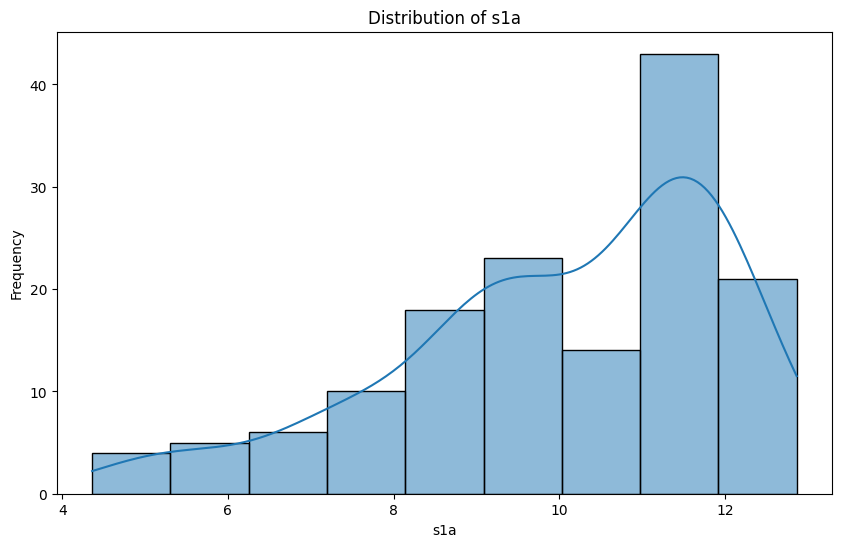


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean      11.725644
std        2.232901
min        5.866700
25%       10.261625
50%       12.453350
75%       13.497575
max       15.918800
Name: s1x, dtype: float64


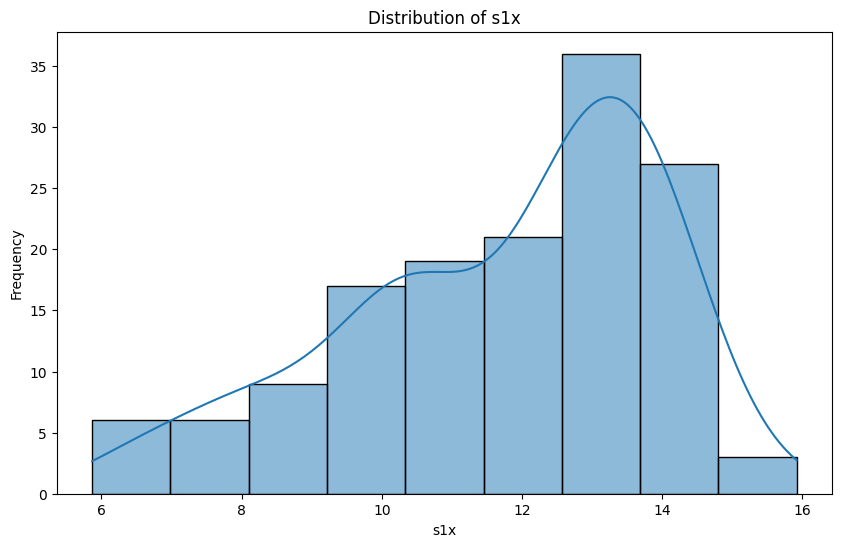


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       8.067669
std        1.937902
min        2.791400
25%        7.140425
50%        8.368250
75%        9.504275
max       11.237000
Name: s1i, dtype: float64


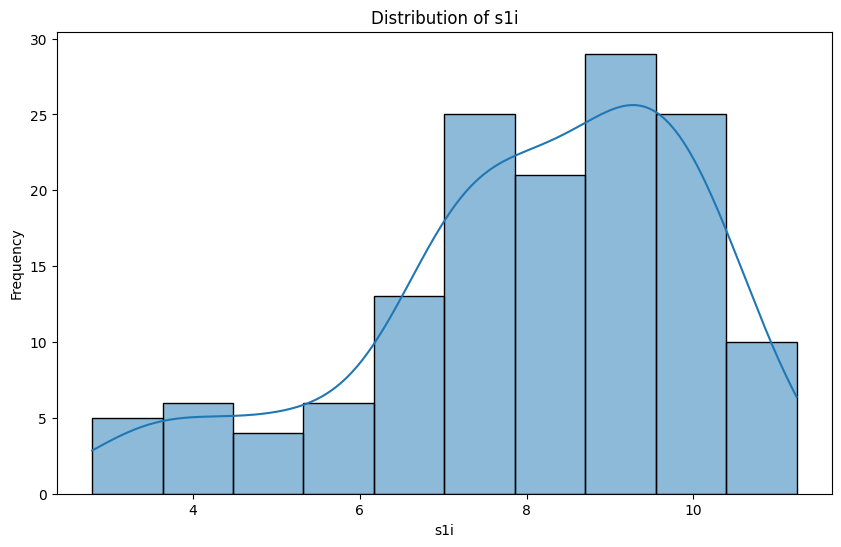


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.659685
std        0.296605
min        0.142290
25%        0.459000
50%        0.628830
75%        0.822758
max        1.404540
Name: s1s, dtype: float64


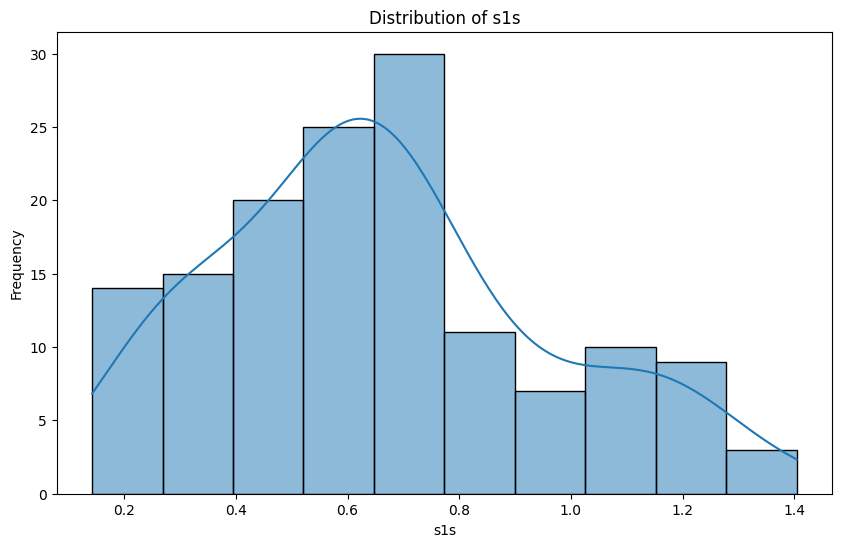


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       9.945445
std        1.934340
min        4.351000
25%        8.912312
50%       10.418980
75%       11.487303
max       12.796600
Name: s2a, dtype: float64


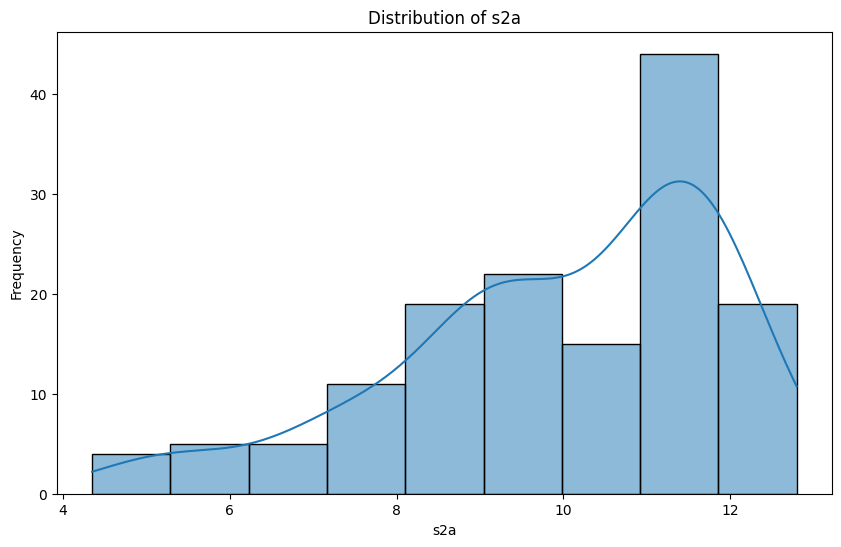


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean      11.651331
std        2.188253
min        6.049300
25%       10.180300
50%       12.360550
75%       13.358875
max       15.642400
Name: s2x, dtype: float64


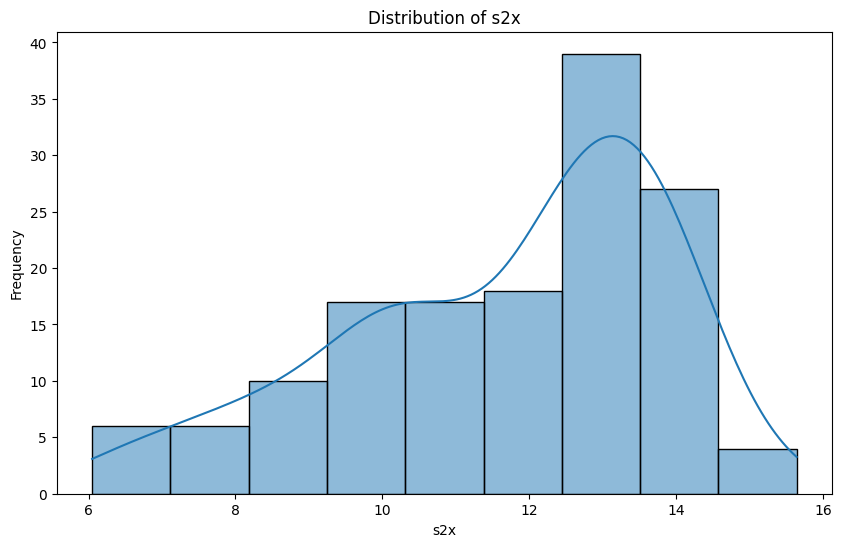


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       8.030969
std        1.895992
min        2.882200
25%        7.059100
50%        8.390200
75%        9.503275
max       11.052400
Name: s2i, dtype: float64


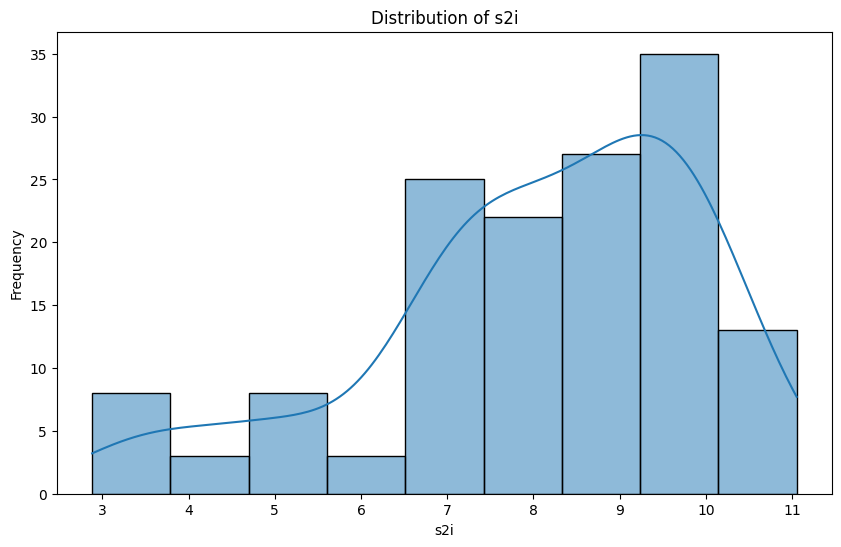


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.657613
std        0.290336
min        0.146880
25%        0.450967
50%        0.624240
75%        0.813577
max        1.377000
Name: s2s, dtype: float64


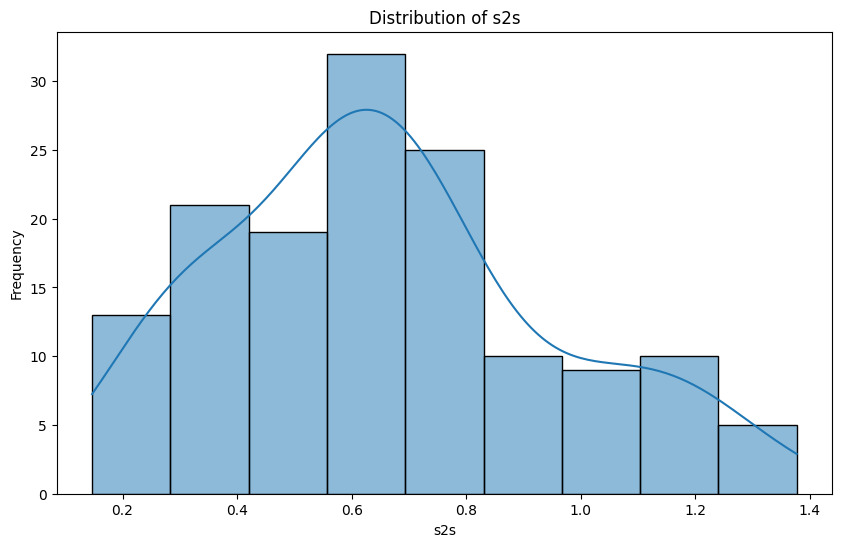


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       9.267195
std        1.758332
min        4.264150
25%        8.147045
50%        9.642405
75%       10.654985
max       12.502400
Name: s3a, dtype: float64


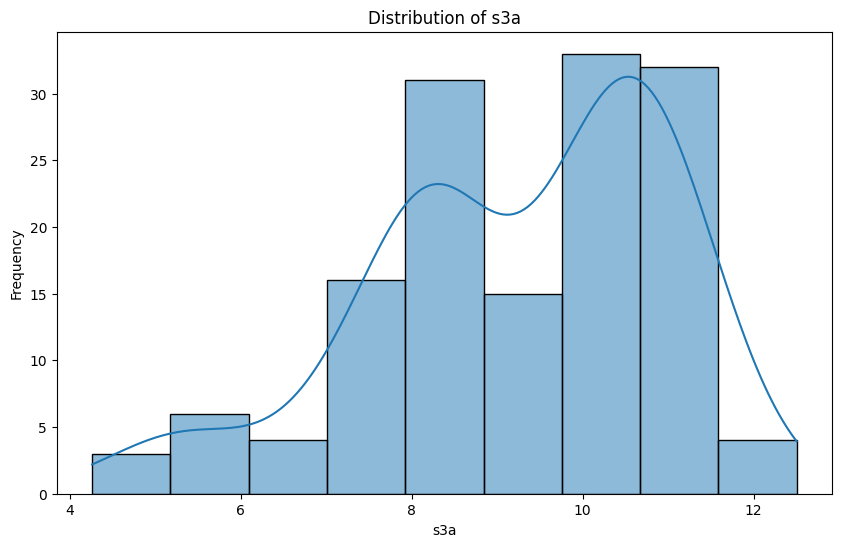


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean      11.090049
std        2.139519
min        5.498050
25%        9.247922
50%       11.828110
75%       12.607900
max       16.185760
Name: s3x, dtype: float64


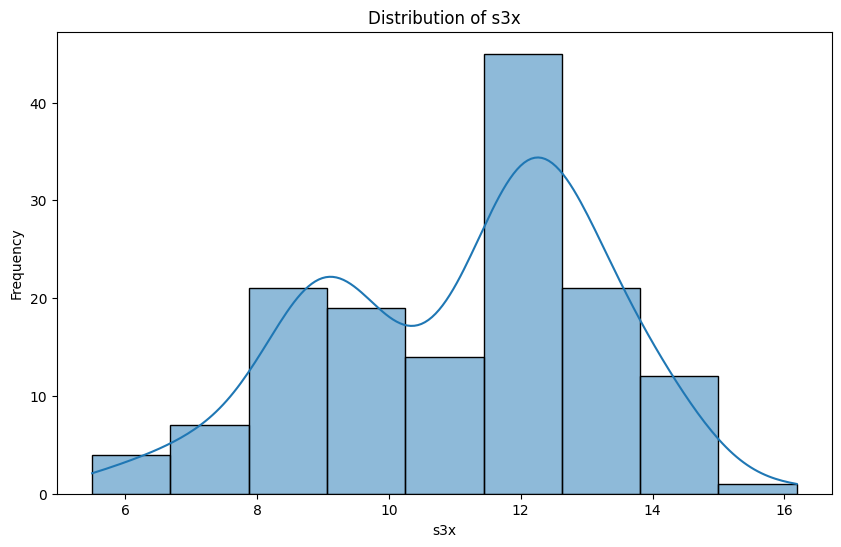


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       7.272009
std        1.649161
min        2.424760
25%        6.438385
50%        7.539265
75%        8.491067
max       10.773100
Name: s3i, dtype: float64


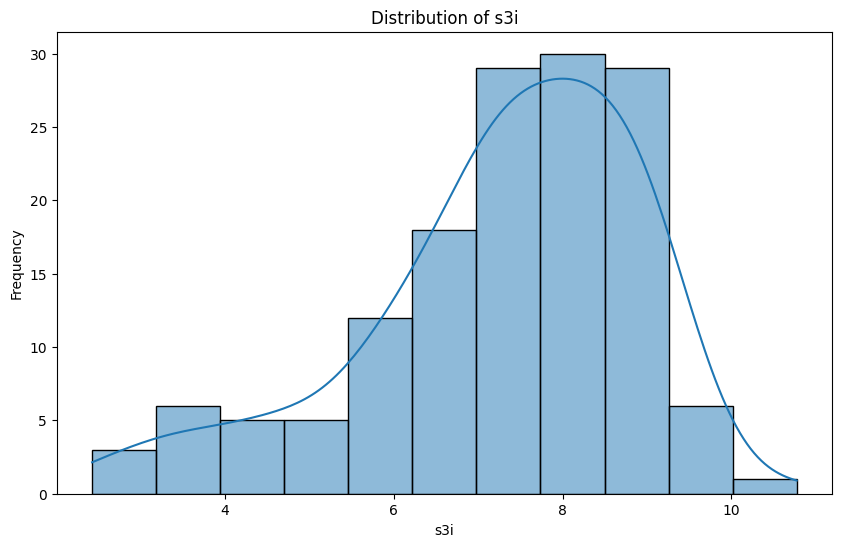


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.683399
std        0.279975
min        0.160540
25%        0.471313
50%        0.651350
75%        0.855475
max        1.417380
Name: s3s, dtype: float64


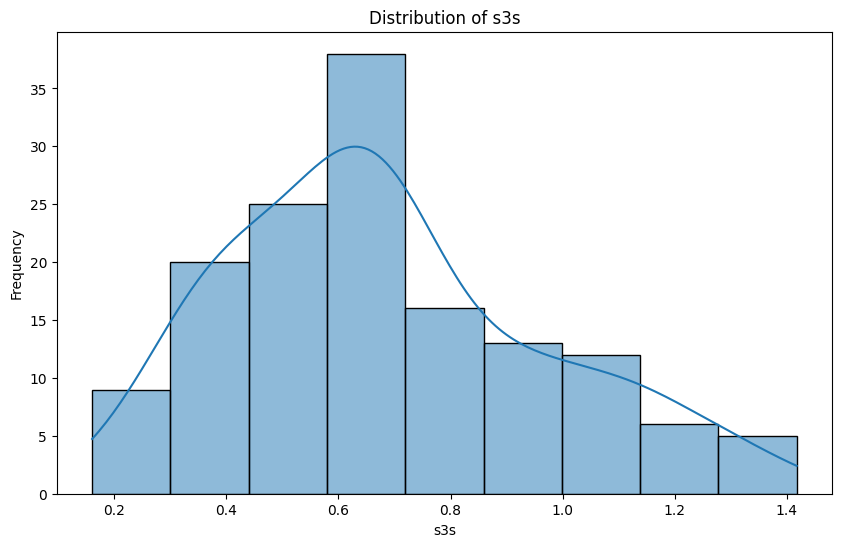


Analysis for column: d1a
Descriptive Statistics:
count    144.00000
mean      83.81250
std       27.03584
min       50.00000
25%       66.00000
50%       69.00000
75%      110.00000
max      138.00000
Name: d1a, dtype: float64


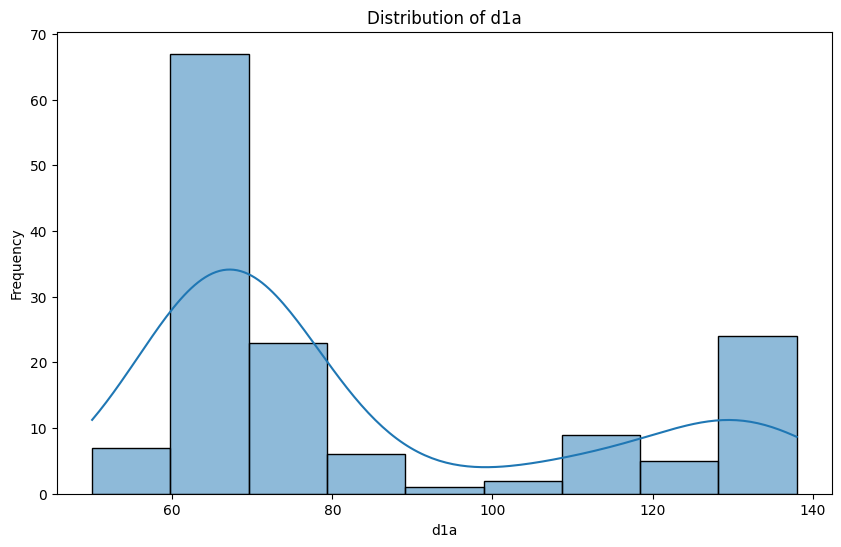


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       4.138889
std        2.387646
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max       13.000000
Name: d1s, dtype: float64


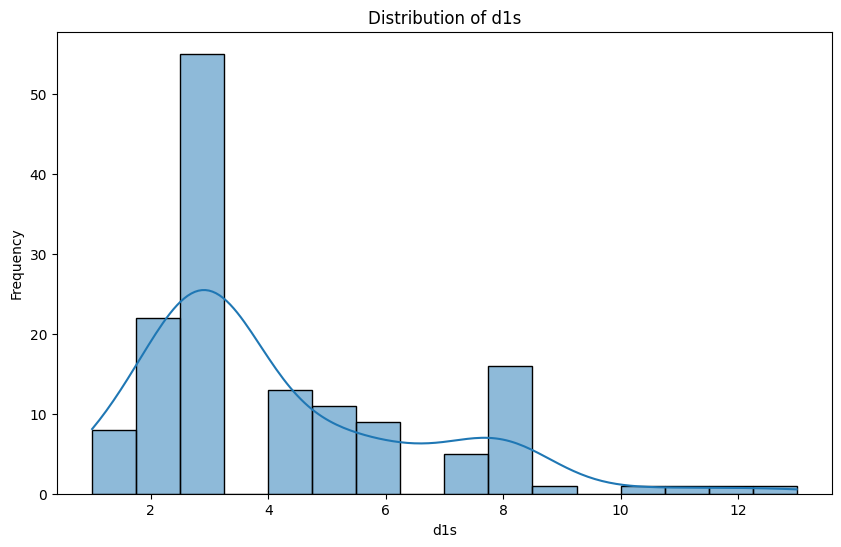


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean      81.694444
std       22.533666
min       49.000000
25%       67.000000
50%       71.000000
75%      102.000000
max      128.000000
Name: d2a, dtype: float64


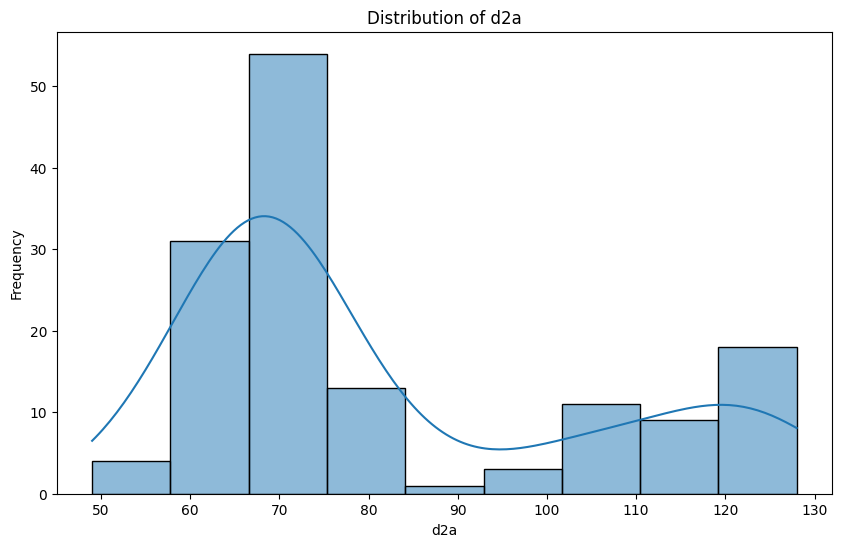


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       4.875000
std        2.341104
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       14.000000
Name: d2s, dtype: float64


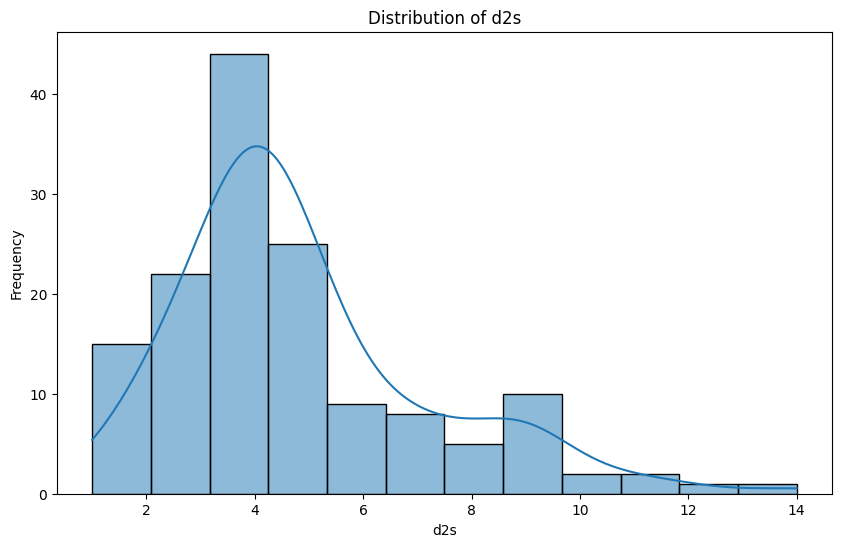


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      73.000000
std       16.677945
min       42.000000
25%       54.750000
50%       81.500000
75%       87.000000
max       94.000000
Name: h1a, dtype: float64


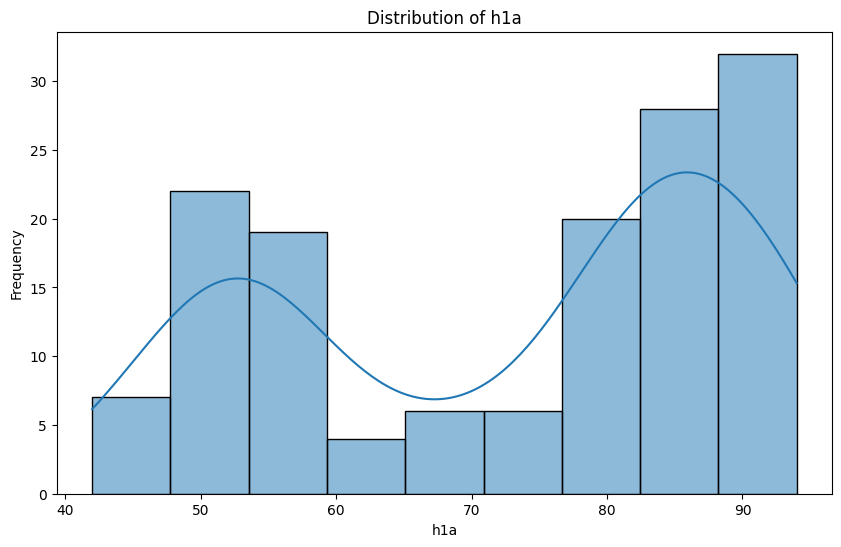


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      74.222222
std       16.657153
min       43.000000
25%       56.000000
50%       82.000000
75%       88.250000
max       97.000000
Name: h1x, dtype: float64


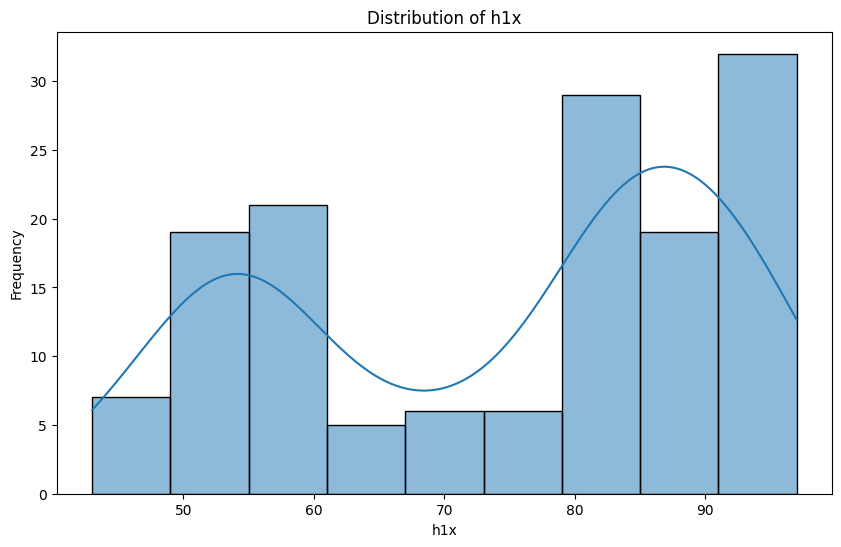


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      71.777778
std       16.746754
min       41.000000
25%       53.750000
50%       80.500000
75%       85.000000
max       93.000000
Name: h1i, dtype: float64


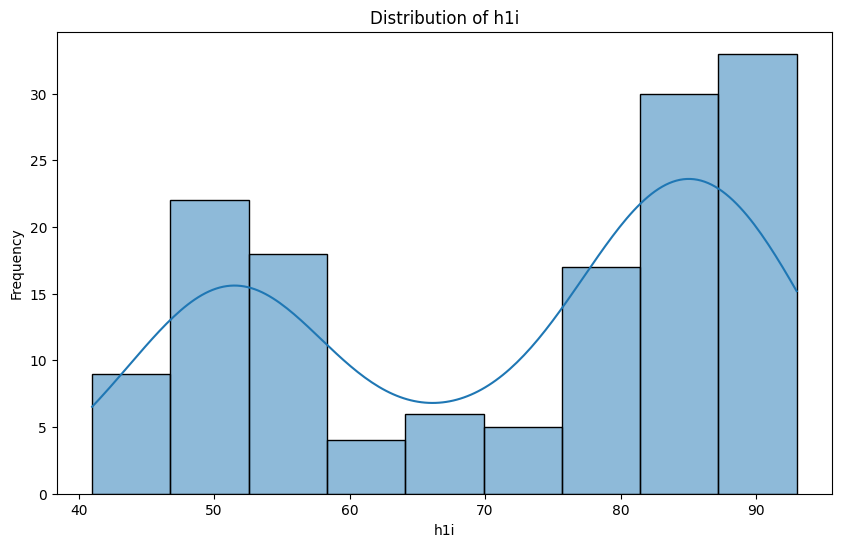


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       2.047917
std        1.942260
min       -1.650000
25%        0.650000
50%        1.650000
75%        4.050000
max        5.150000
Name: t1a, dtype: float64


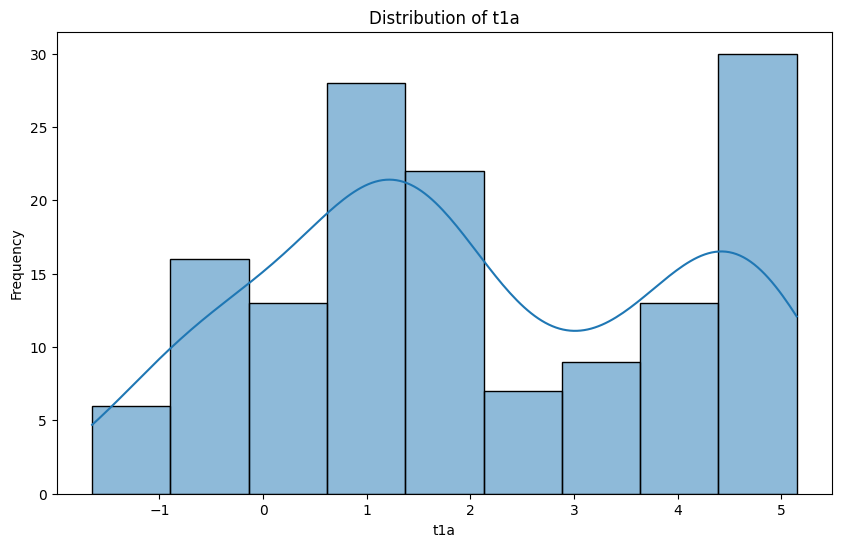


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       2.177083
std        1.918012
min       -1.650000
25%        0.850000
50%        1.700000
75%        4.075000
max        5.350000
Name: t1x, dtype: float64


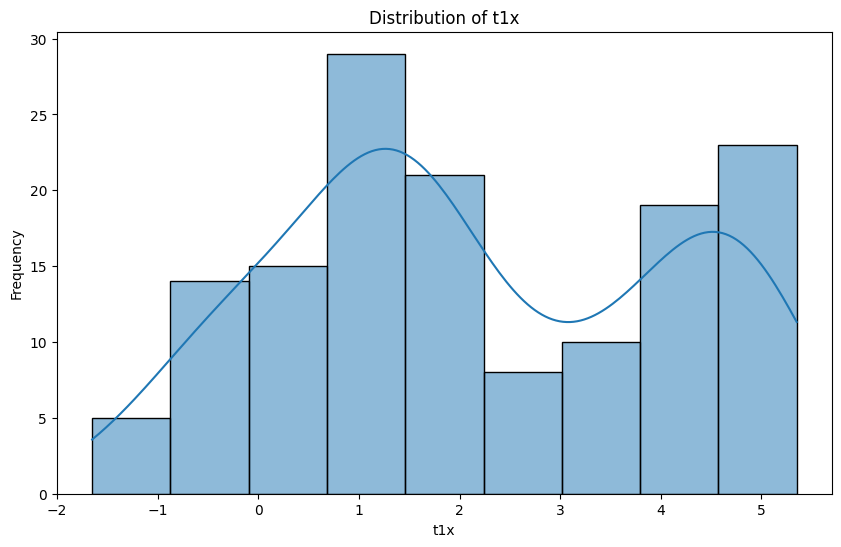


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       1.928472
std        1.983610
min       -1.750000
25%        0.450000
50%        1.550000
75%        3.875000
max        5.150000
Name: t1i, dtype: float64


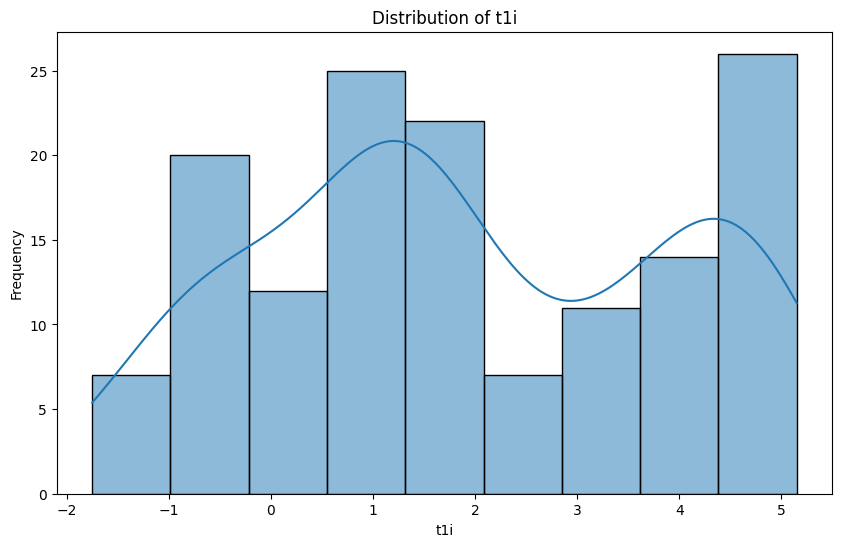


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1012.583333
std         1.864276
min      1009.000000
25%      1011.000000
50%      1013.000000
75%      1014.000000
max      1016.000000
Name: b1a, dtype: float64


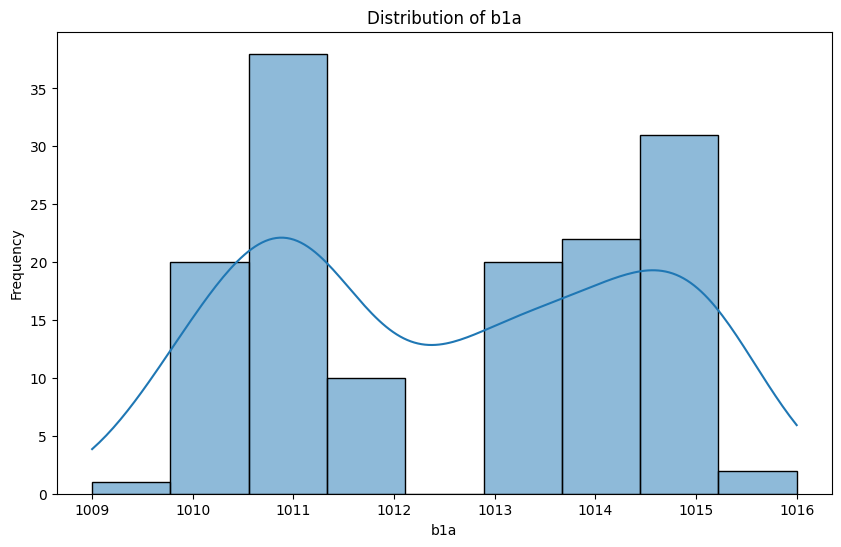


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1012.888889
std         1.968675
min      1010.000000
25%      1011.000000
50%      1013.000000
75%      1015.000000
max      1016.000000
Name: b1x, dtype: float64


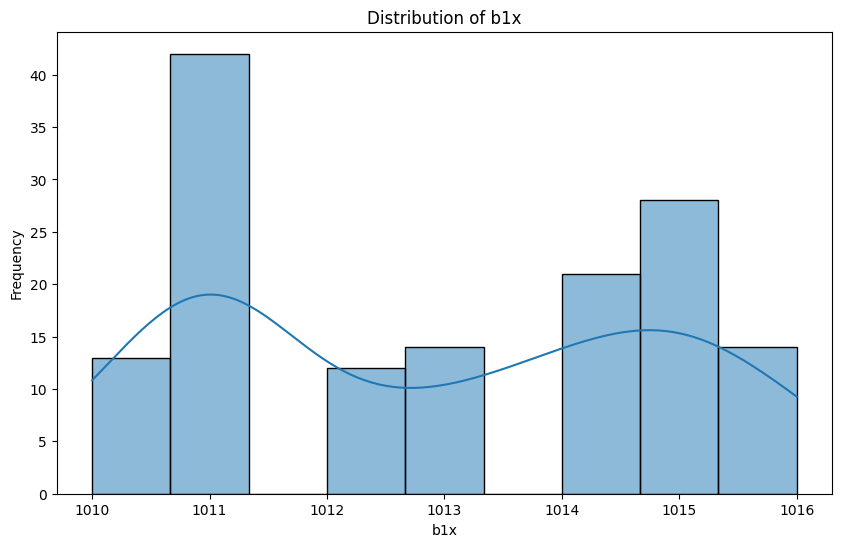


Analysis for column: b1i
Descriptive Statistics:
count     144.000
mean     1012.250
std         1.811
min      1009.000
25%      1011.000
50%      1012.000
75%      1014.000
max      1015.000
Name: b1i, dtype: float64


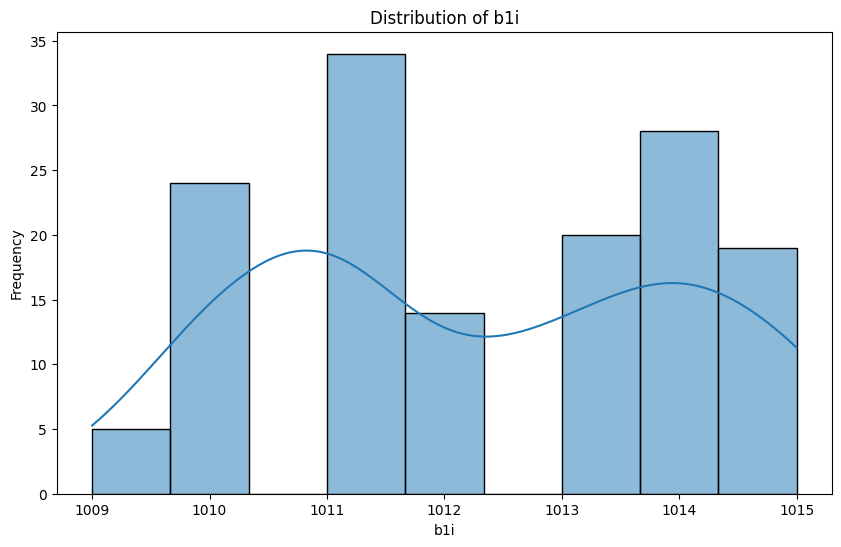


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       8.198229
std        1.829030
min        4.166520
25%        6.696293
50%        8.513095
75%        9.370490
max       11.906000
Name: p1a, dtype: float64


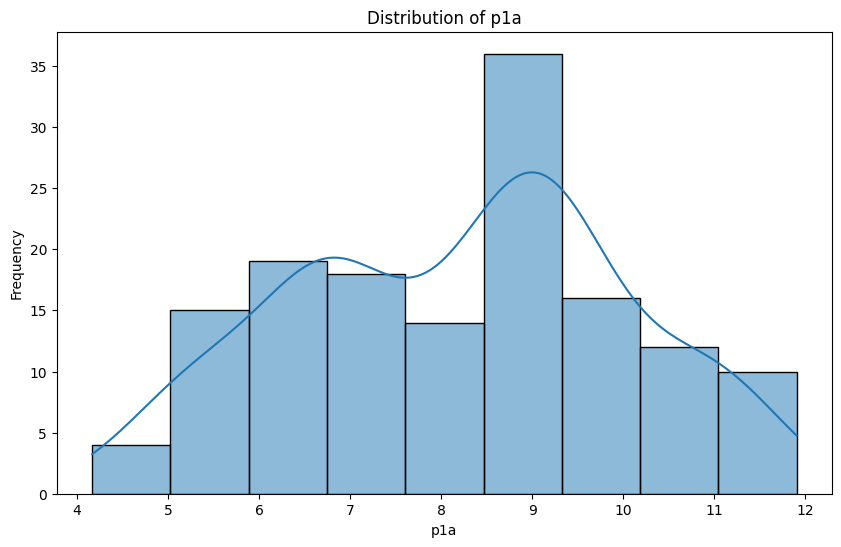


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean      10.105173
std        2.374912
min        5.638300
25%        7.827637
50%       10.429625
75%       11.610263
max       14.945850
Name: p1x, dtype: float64


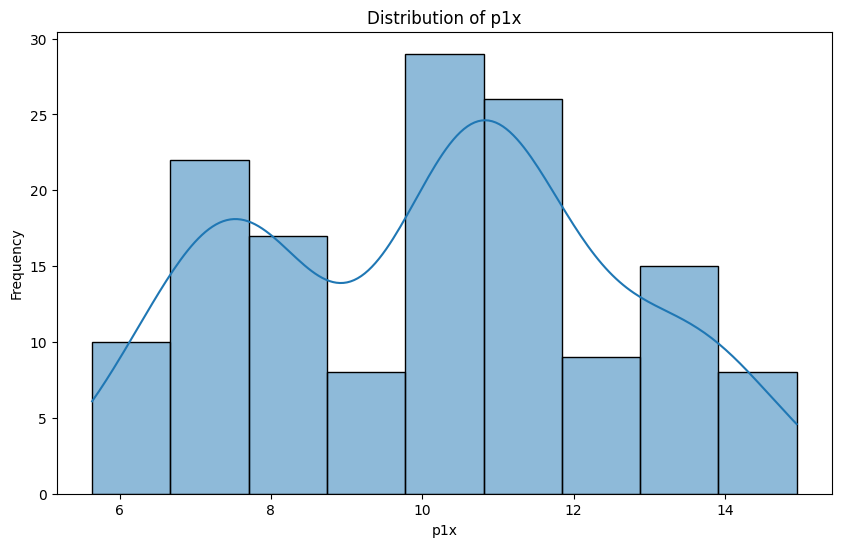


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       6.263643
std        1.385230
min        2.658050
25%        5.523675
50%        6.440675
75%        7.380600
max        9.031200
Name: p1i, dtype: float64


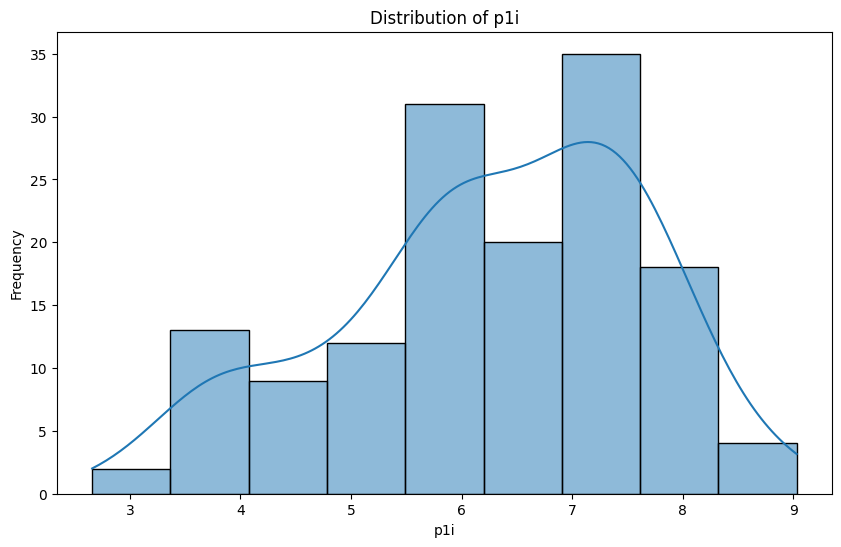


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.697400
std        0.298735
min        0.114630
25%        0.495180
50%        0.646490
75%        0.883760
max        1.435110
Name: p1s, dtype: float64


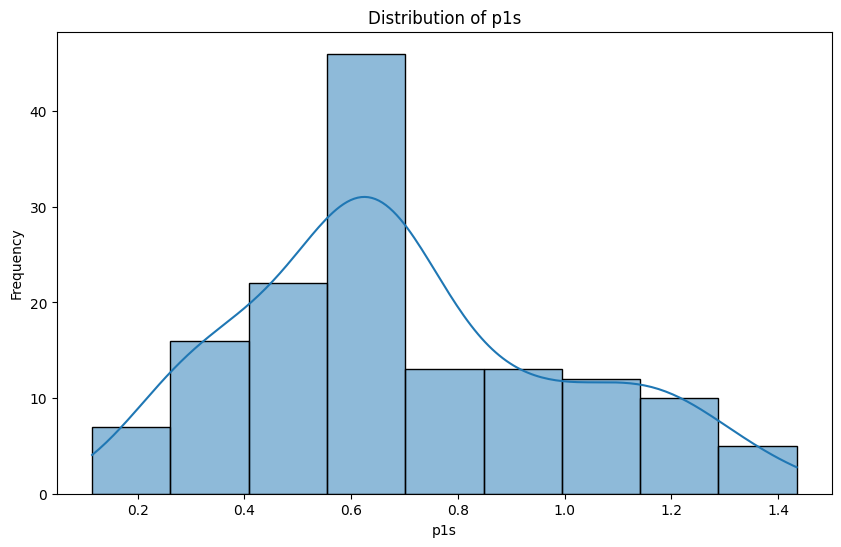


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      41.888889
std        4.274025
min       35.000000
25%       38.000000
50%       41.000000
75%       46.250000
max       48.000000
Name: tia, dtype: float64


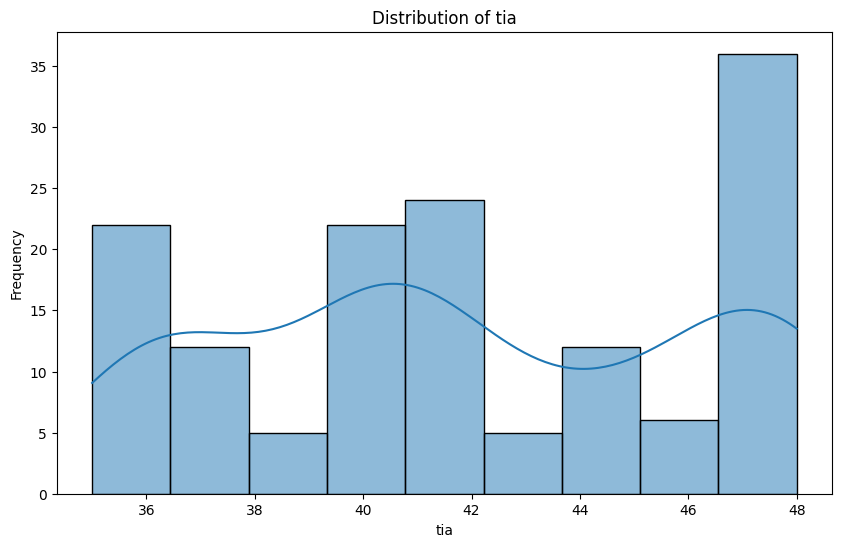


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      41.986111
std        4.245913
min       35.000000
25%       38.750000
50%       41.000000
75%       46.250000
max       48.000000
Name: tix, dtype: float64


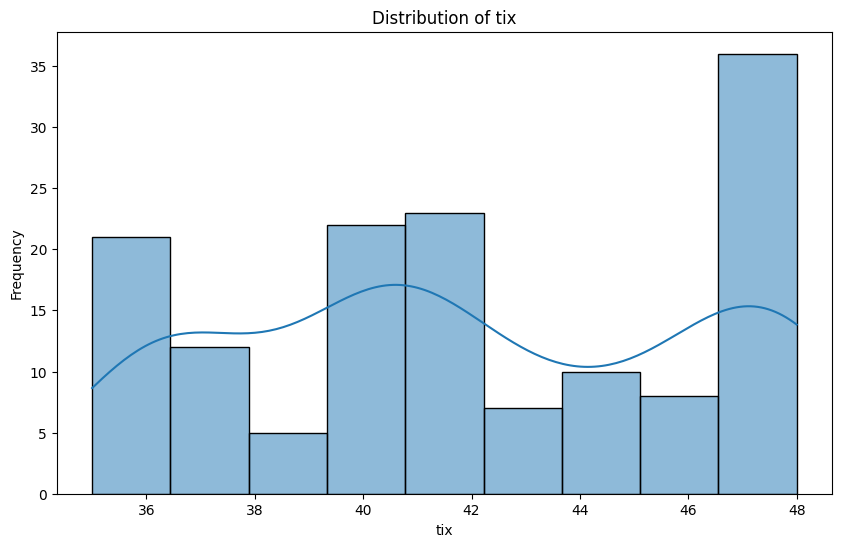


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      41.777778
std        4.220238
min       35.000000
25%       38.000000
50%       41.000000
75%       46.000000
max       48.000000
Name: tii, dtype: float64


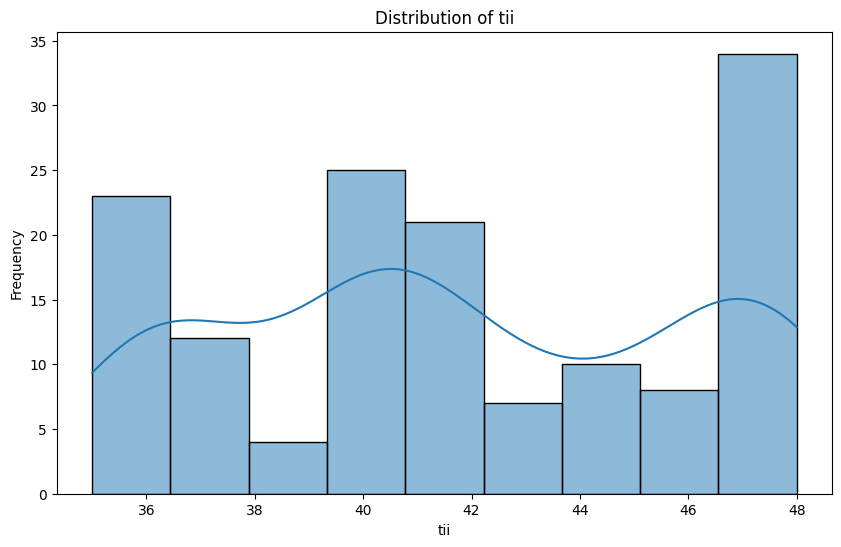


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.763889
std        6.011628
min      124.000000
25%      126.000000
50%      127.000000
75%      137.000000
max      140.000000
Name: vxa, dtype: float64


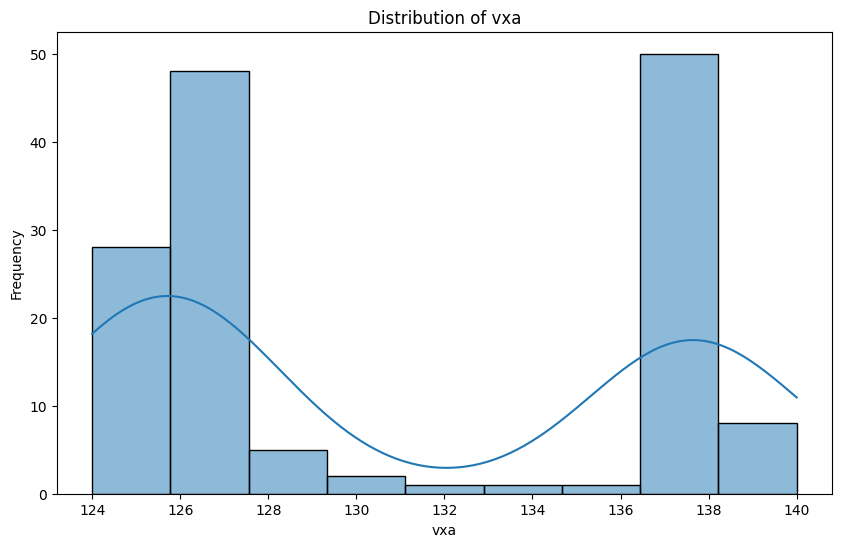


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     131.131944
std        6.262606
min      124.000000
25%      126.000000
50%      127.000000
75%      138.000000
max      140.000000
Name: vxx, dtype: float64


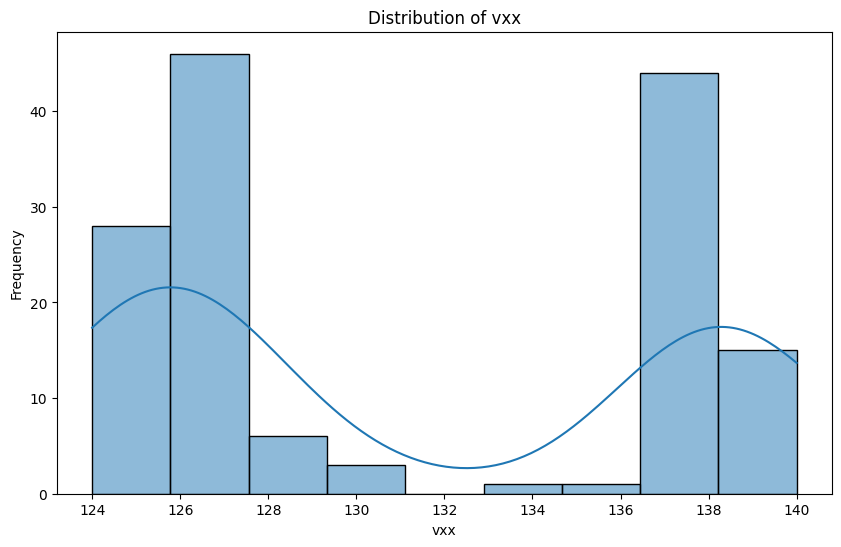


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.416667
std        5.796671
min      124.000000
25%      126.000000
50%      127.000000
75%      137.000000
max      140.000000
Name: vxi, dtype: float64


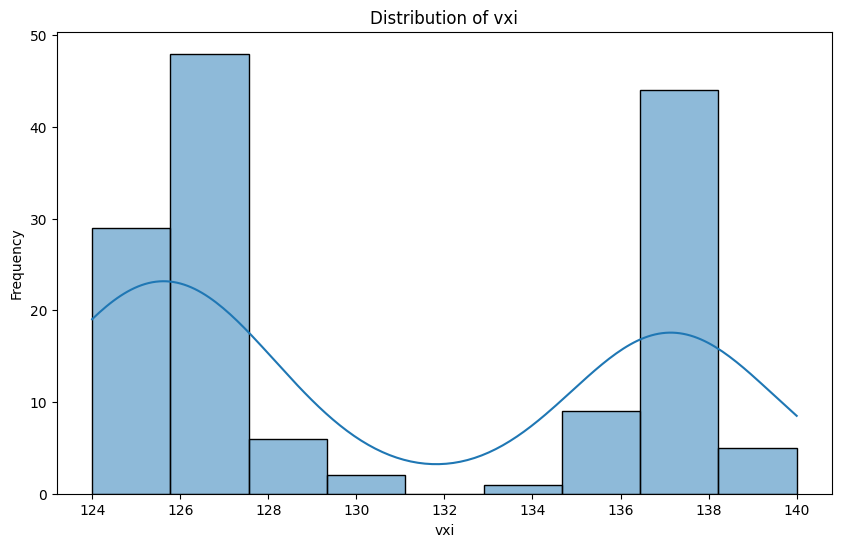


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


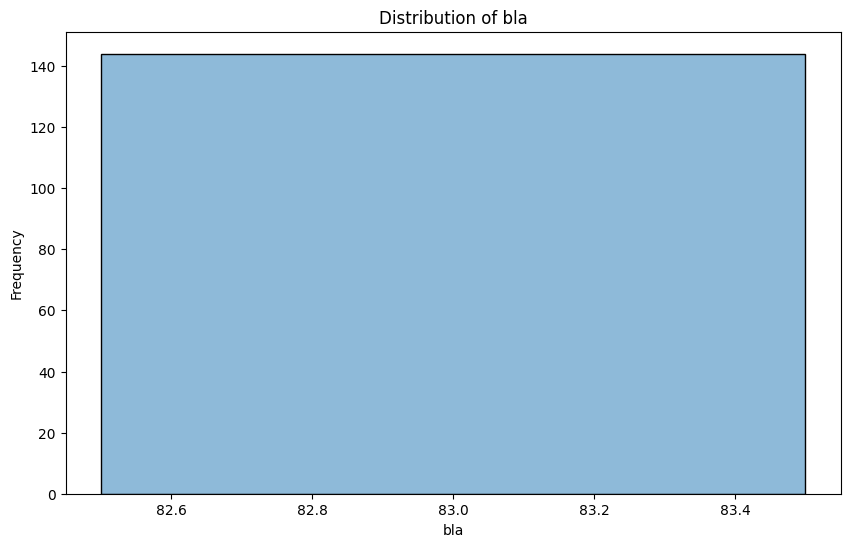


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


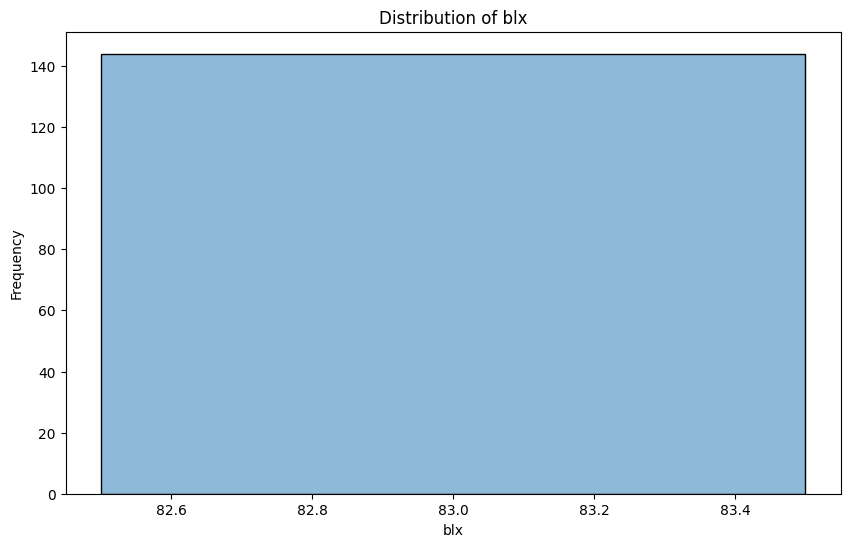


Analysis for column: bli
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bli, dtype: float64


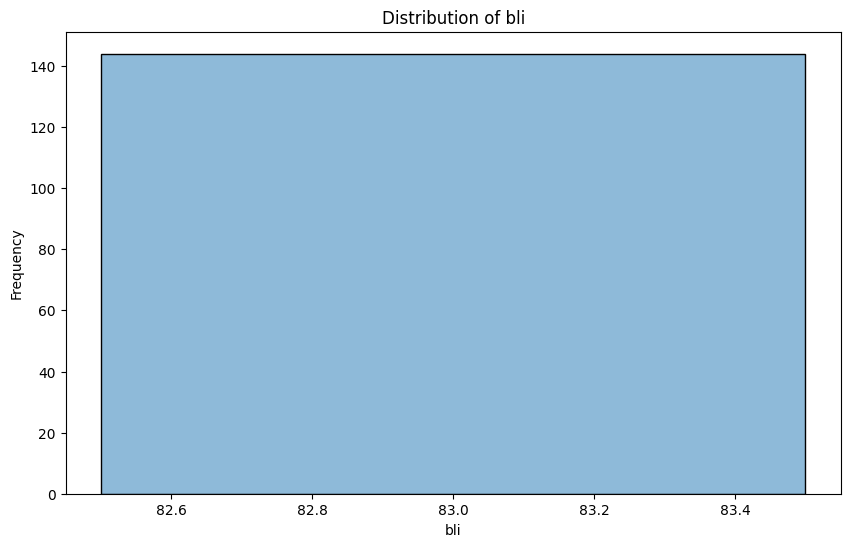


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


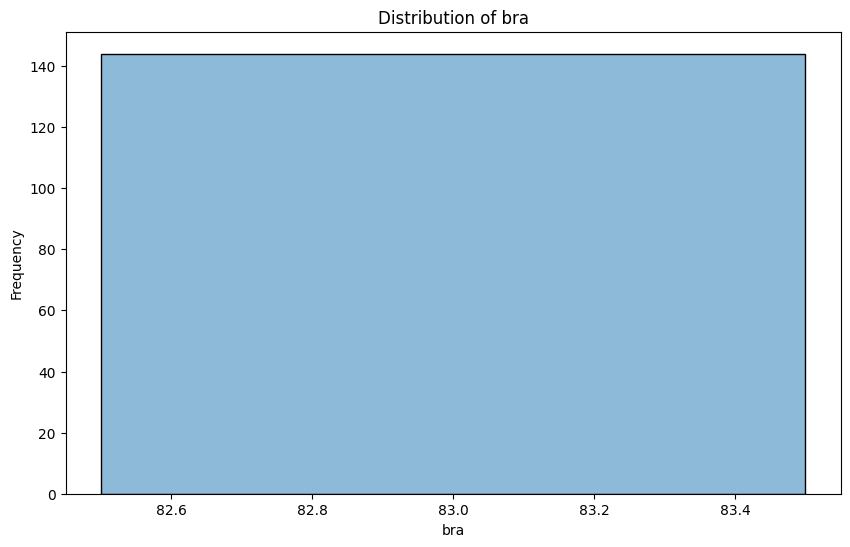


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


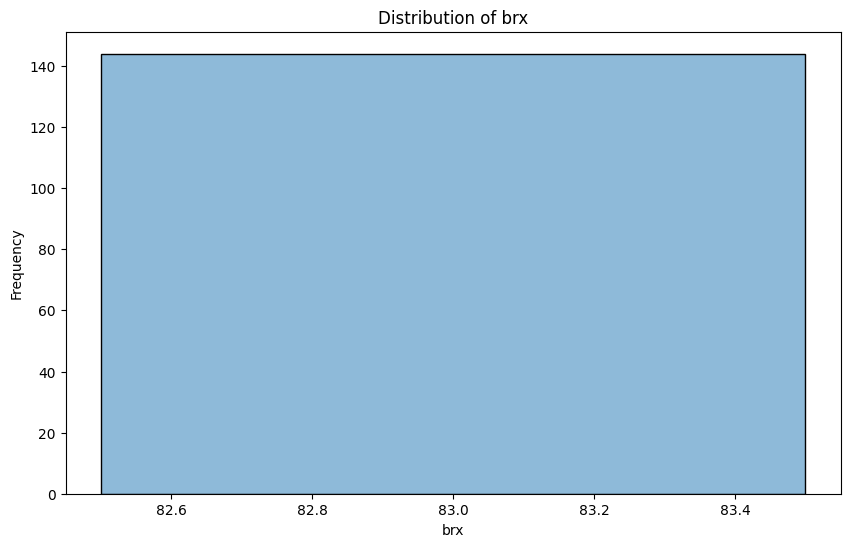


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


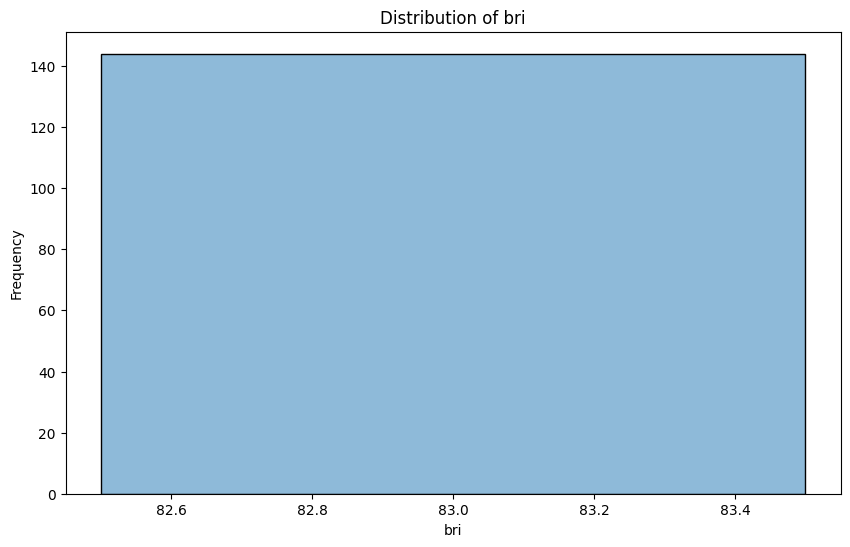

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

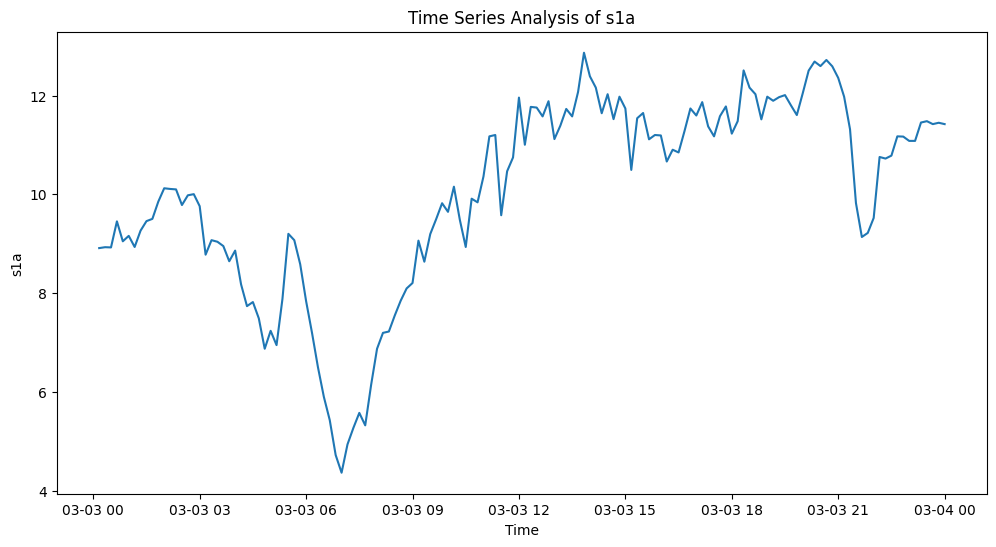

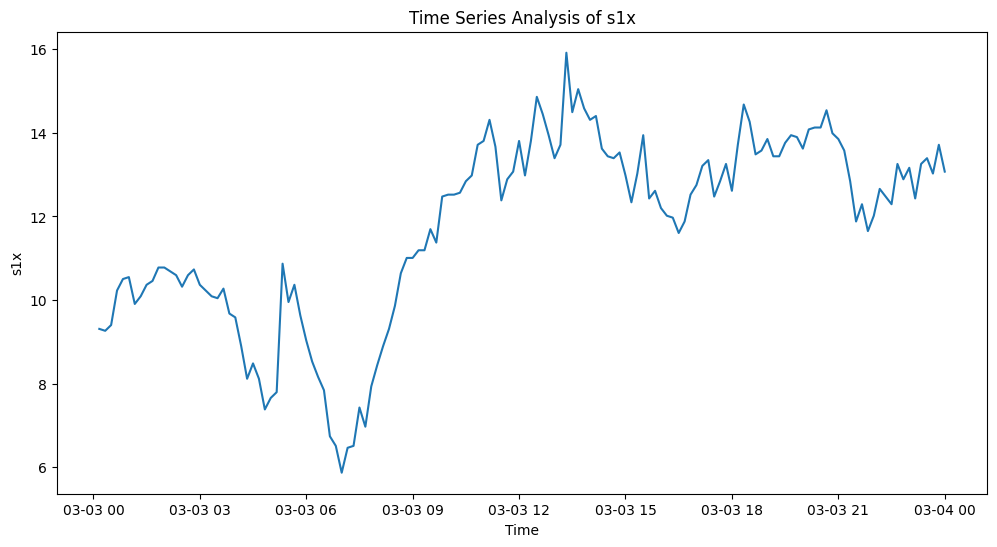

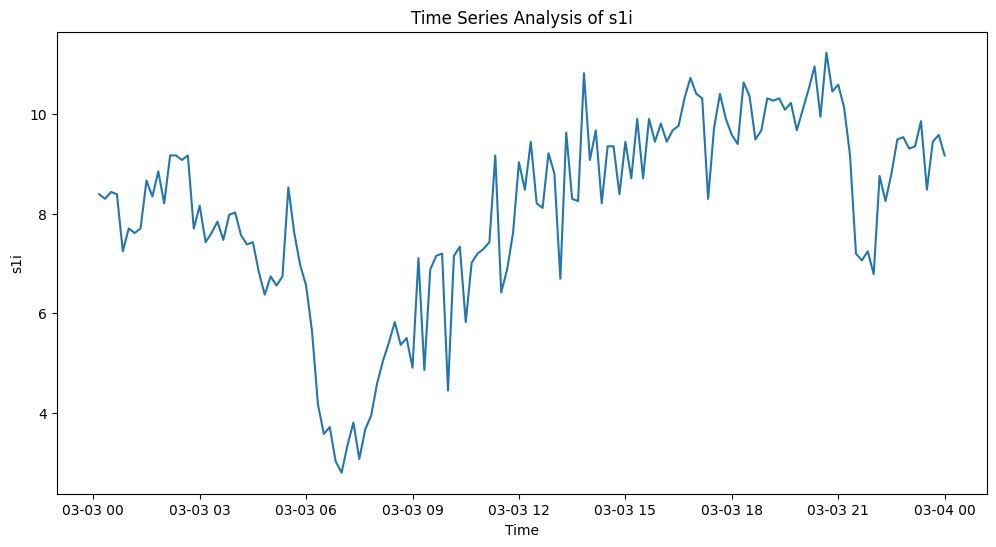

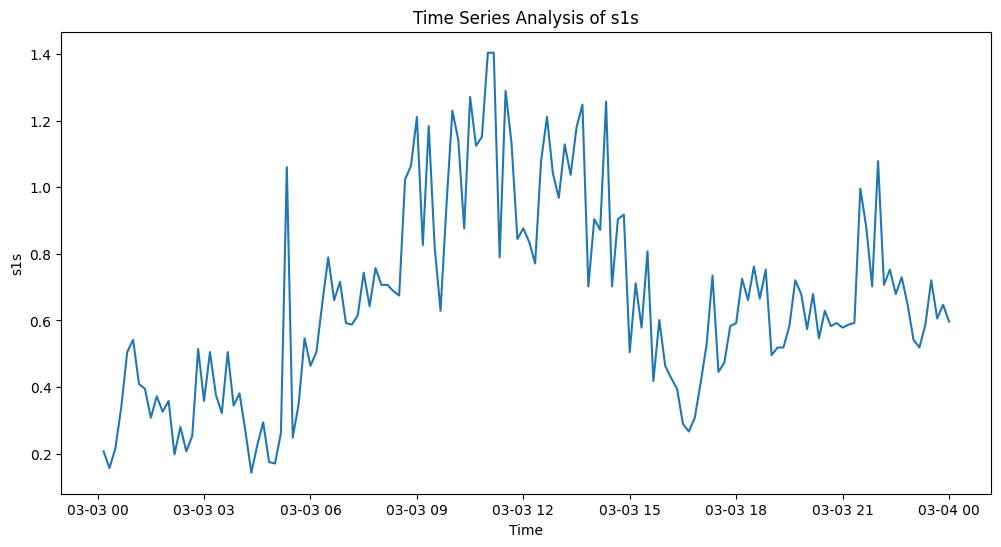

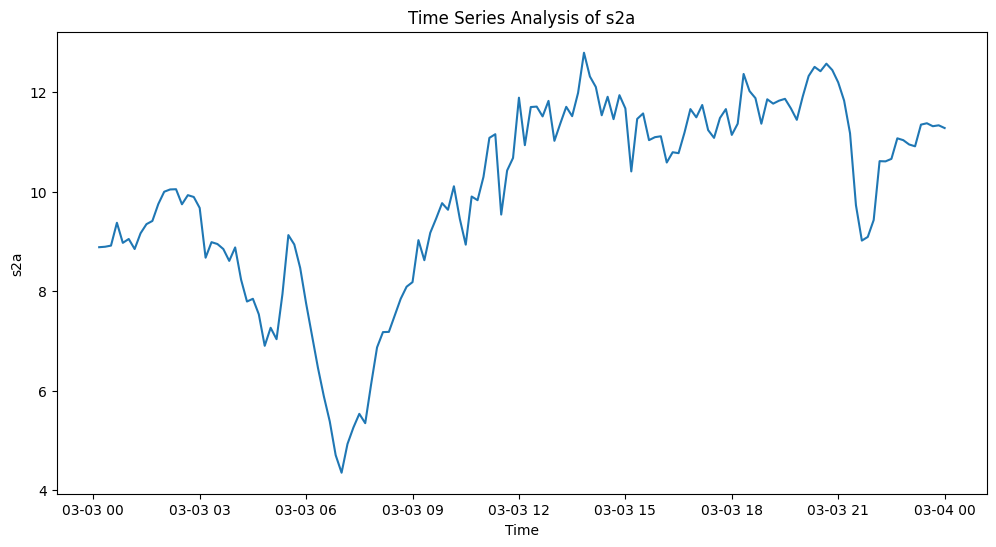

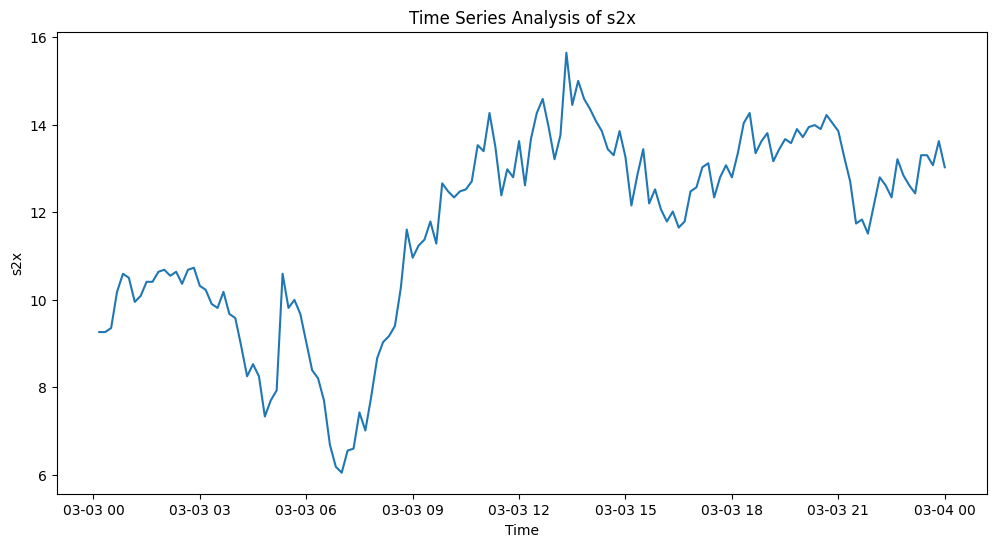

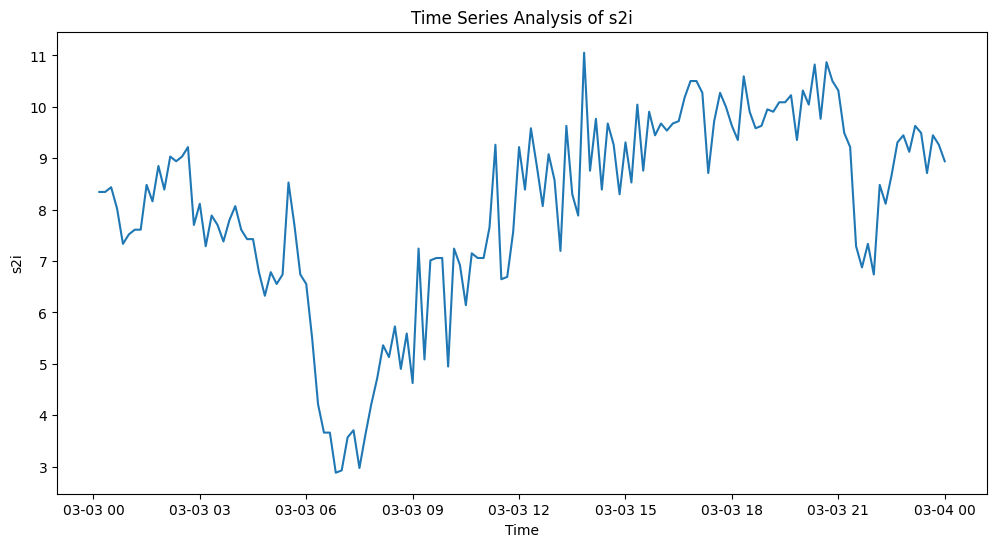

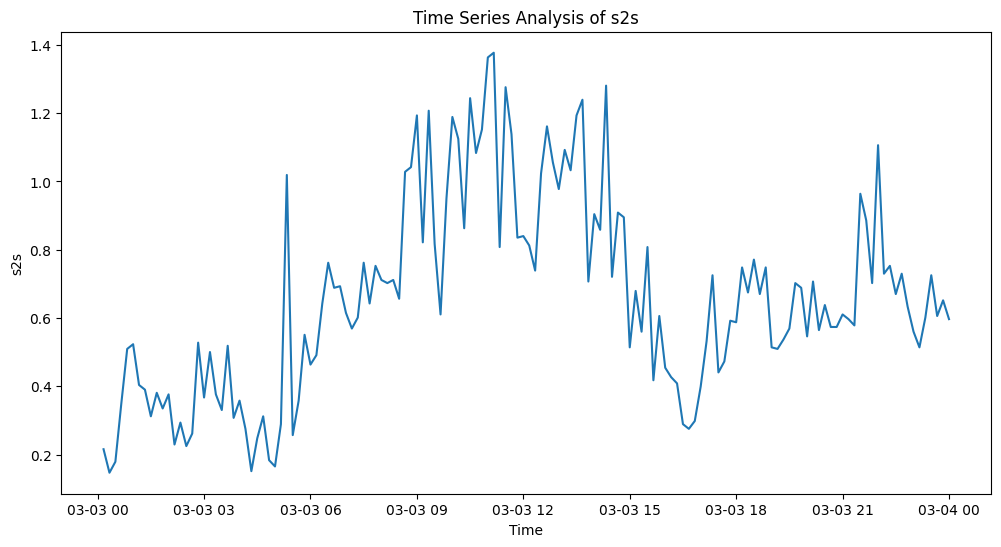

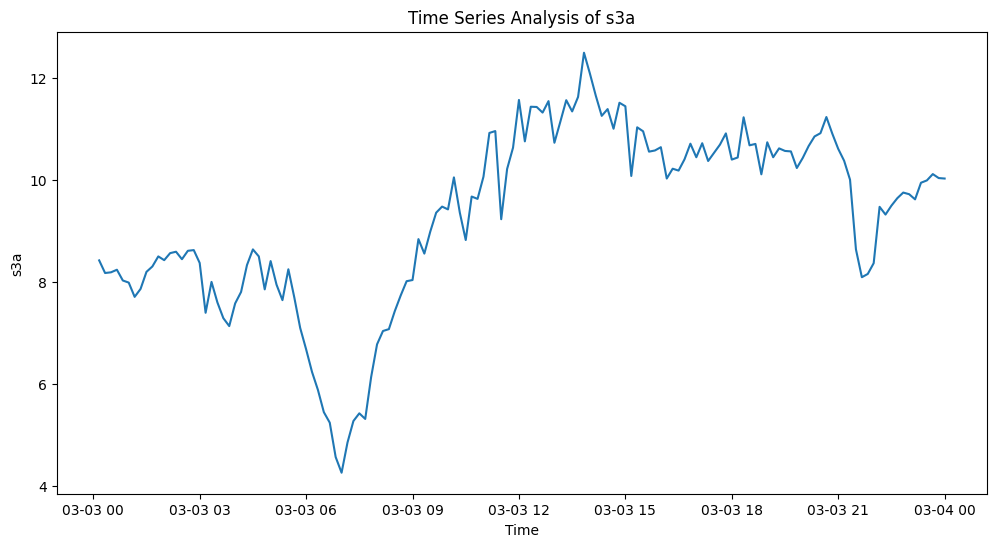

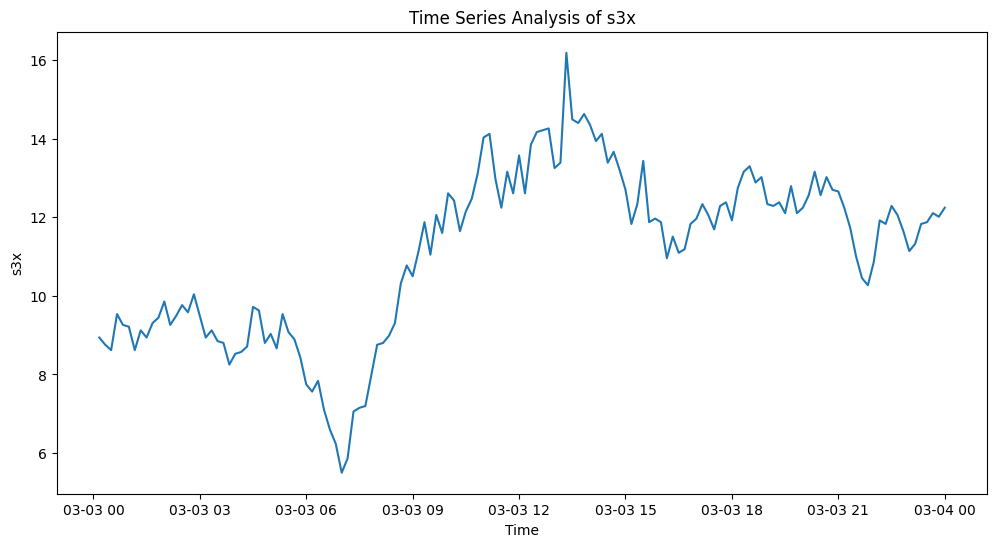

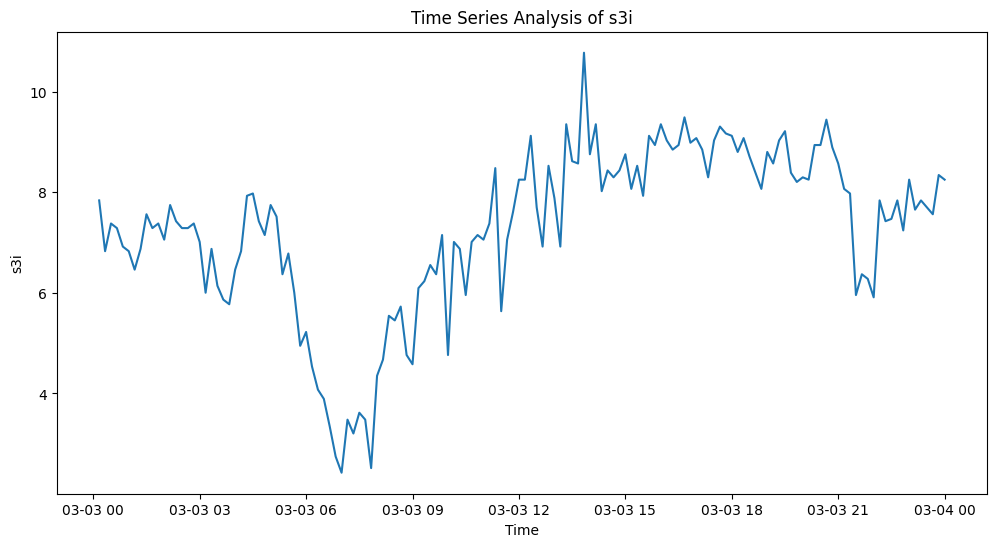

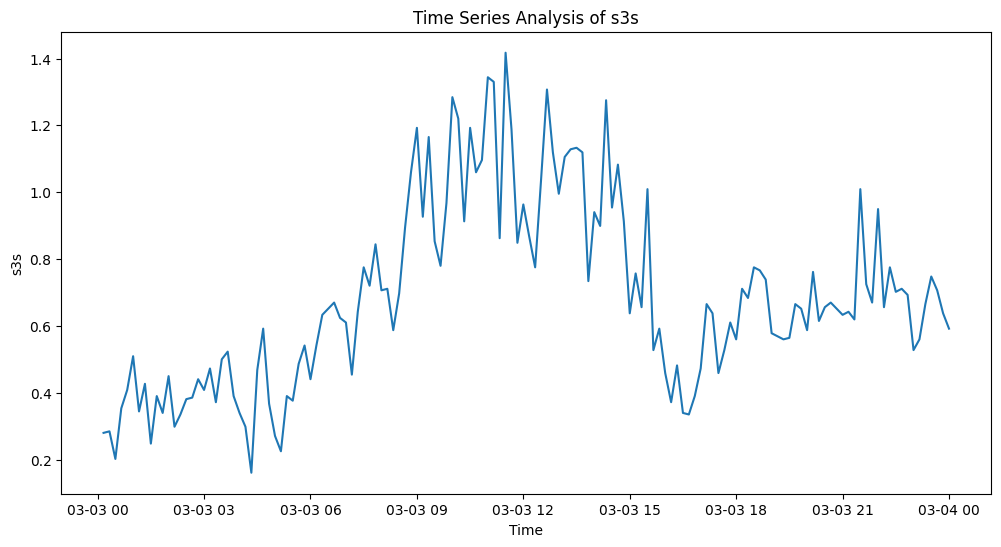

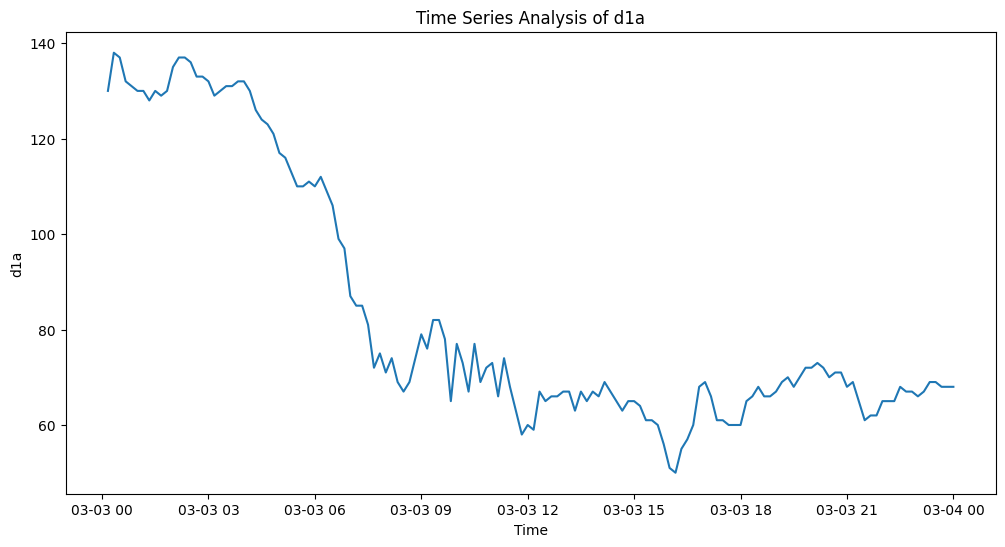

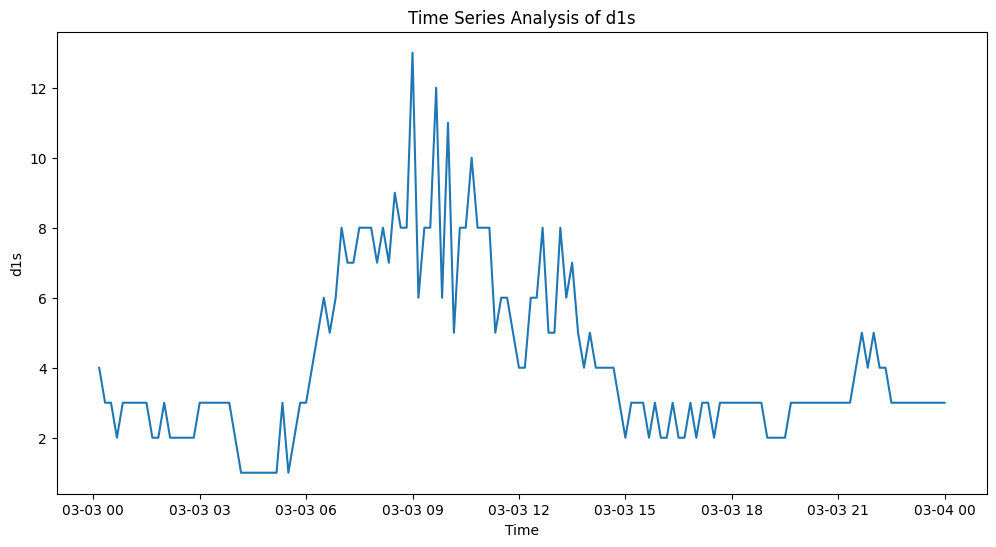

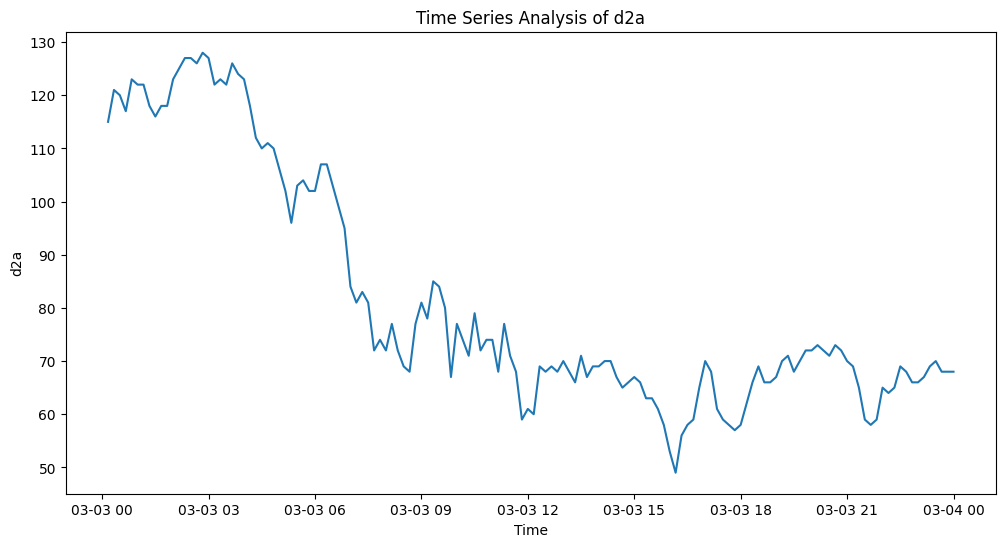

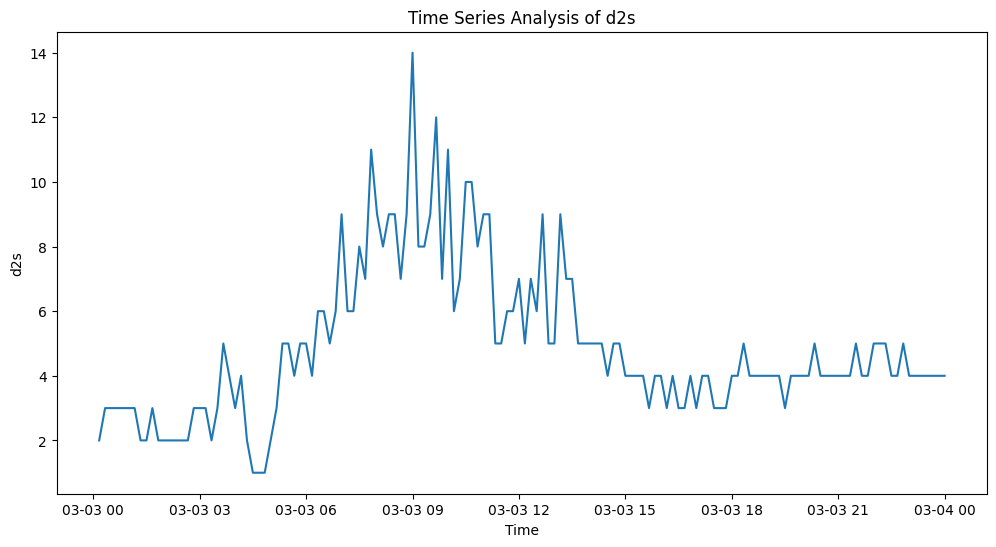

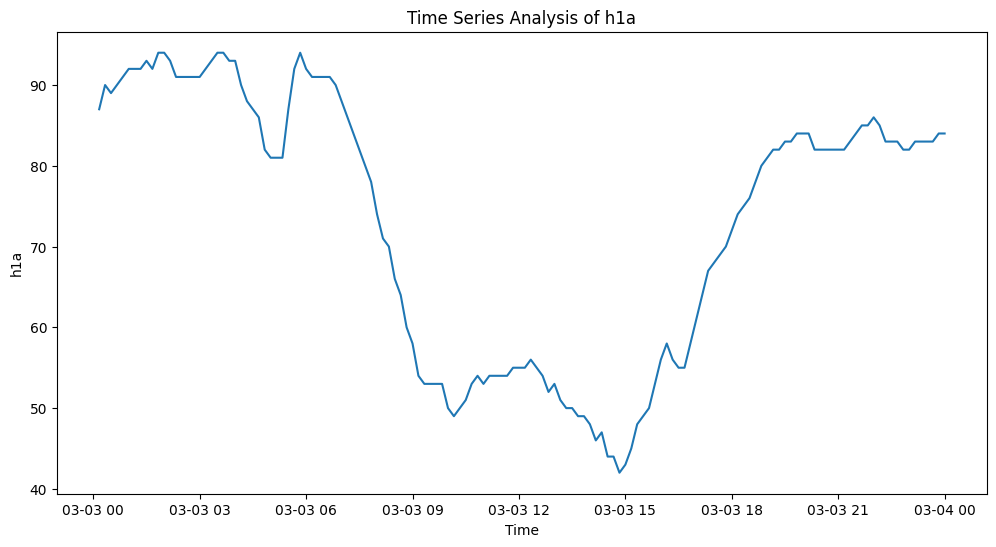

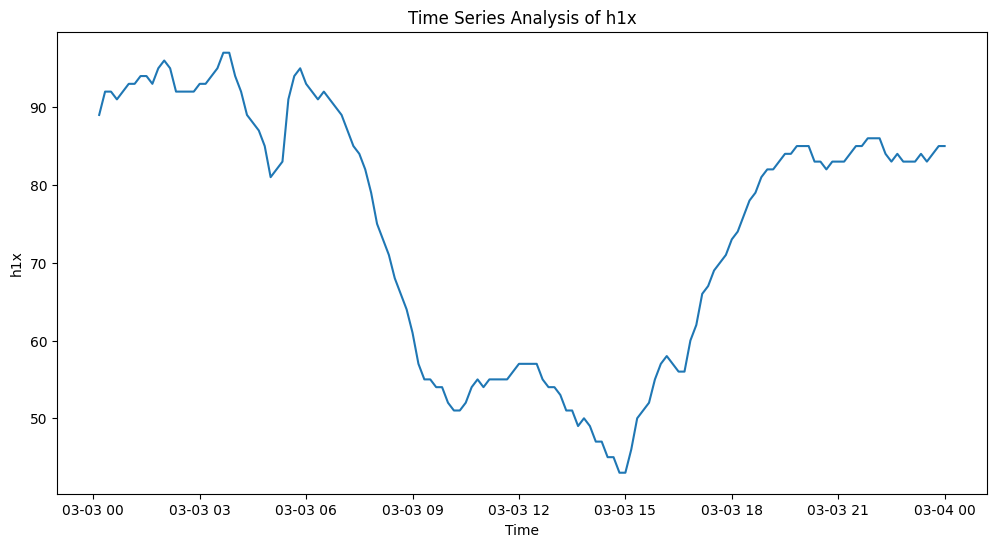

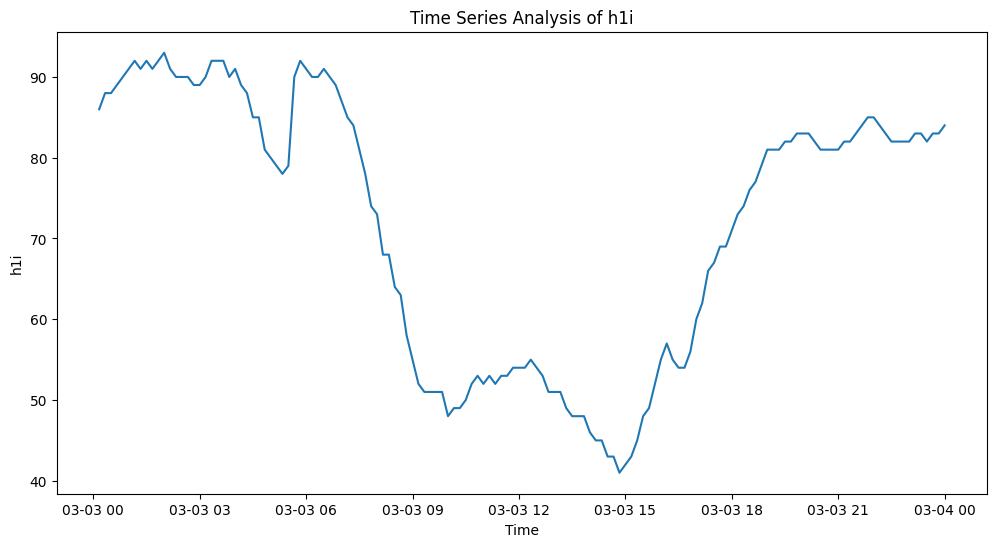

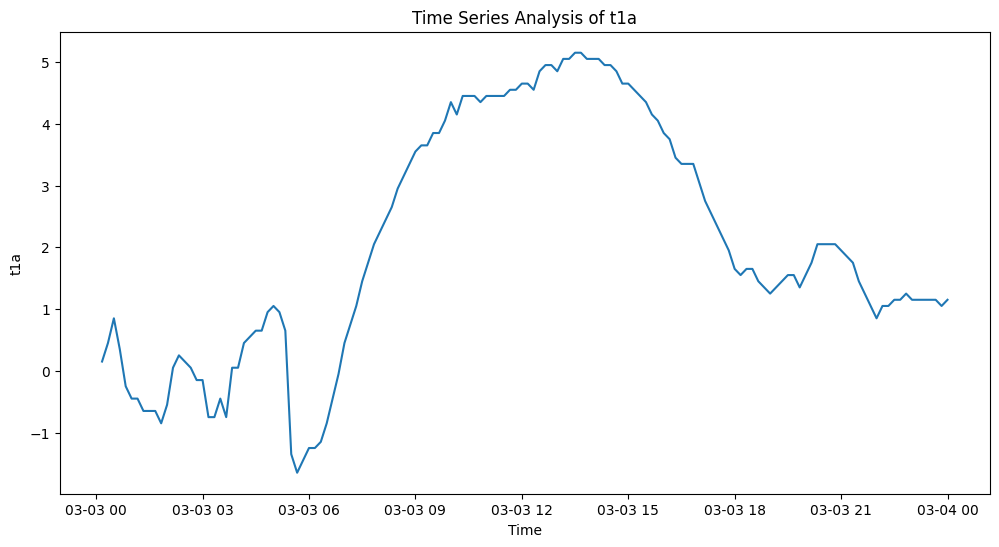

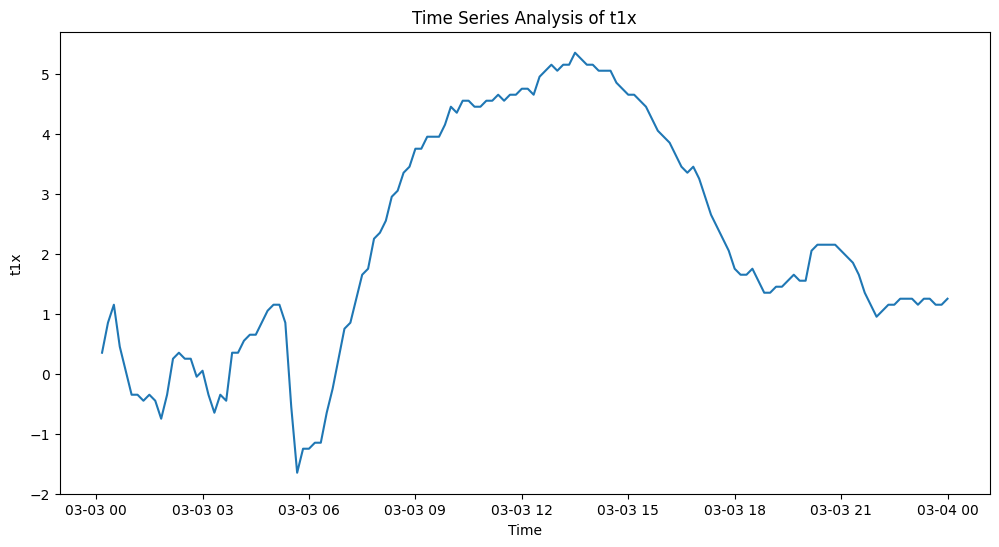

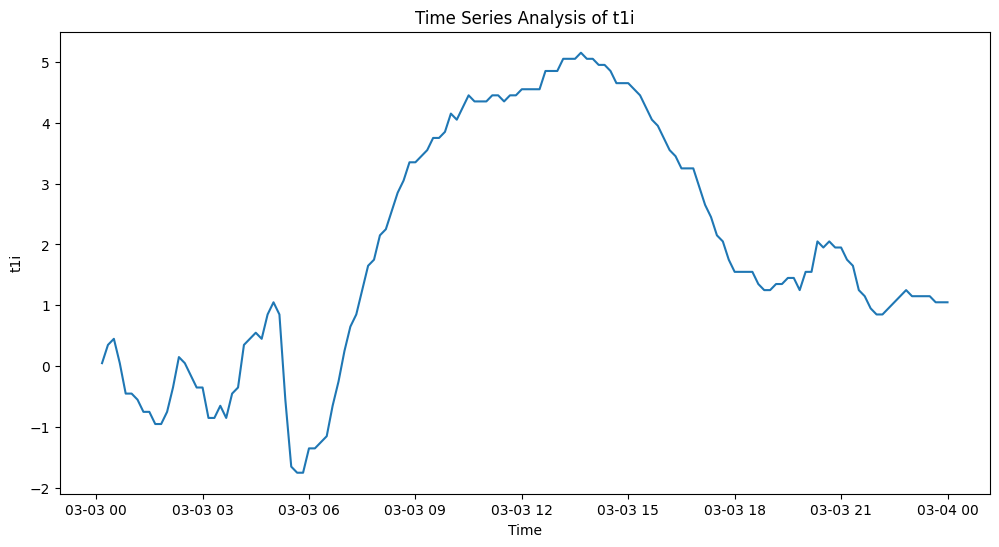

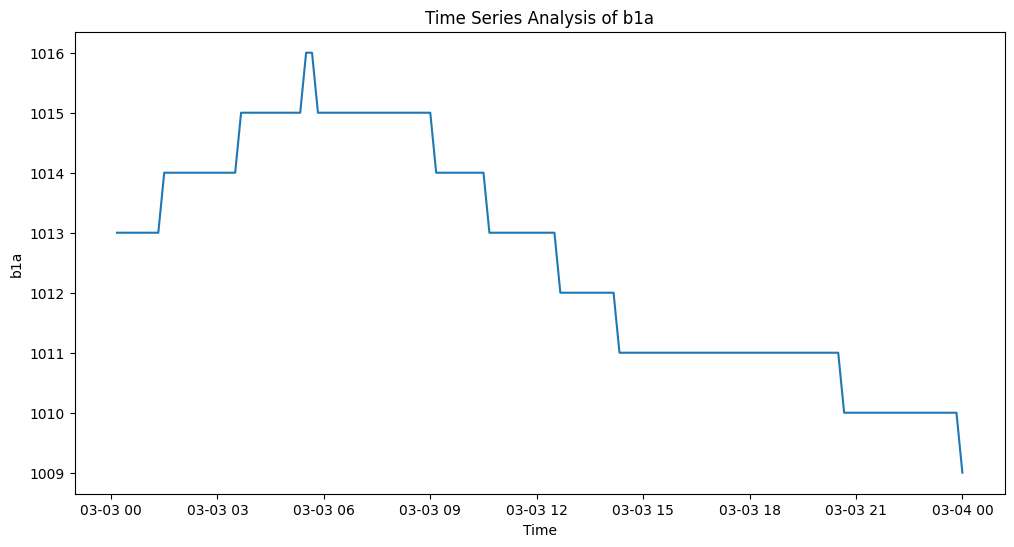

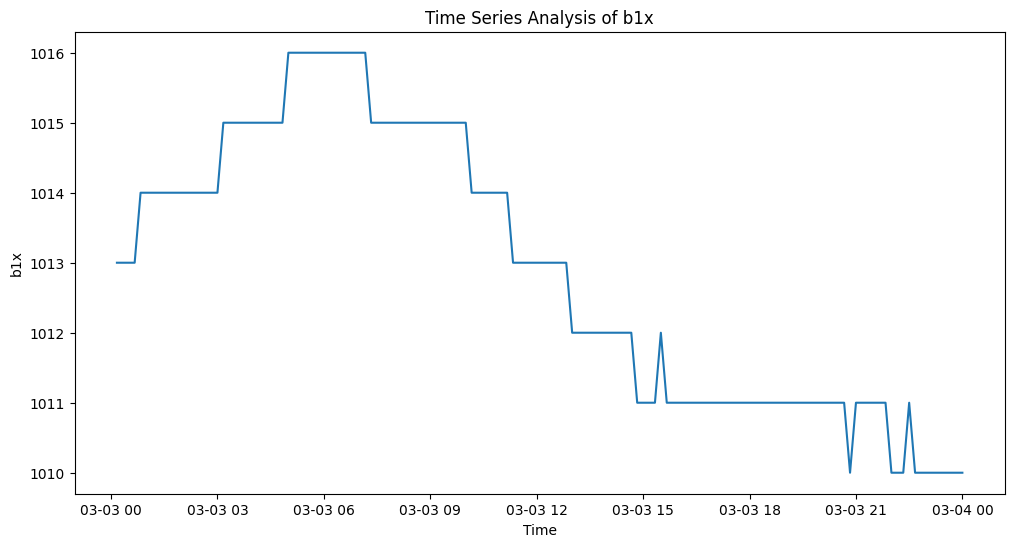

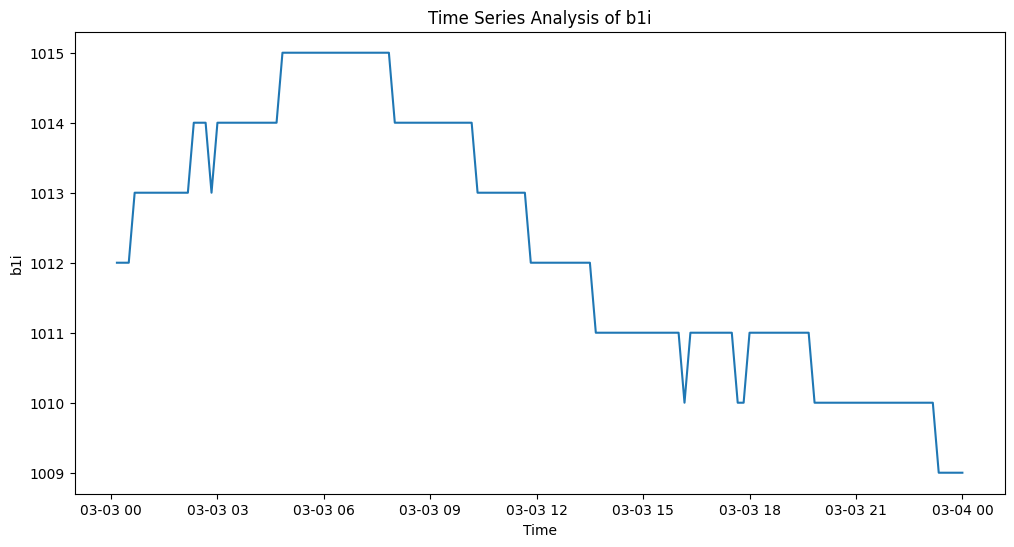

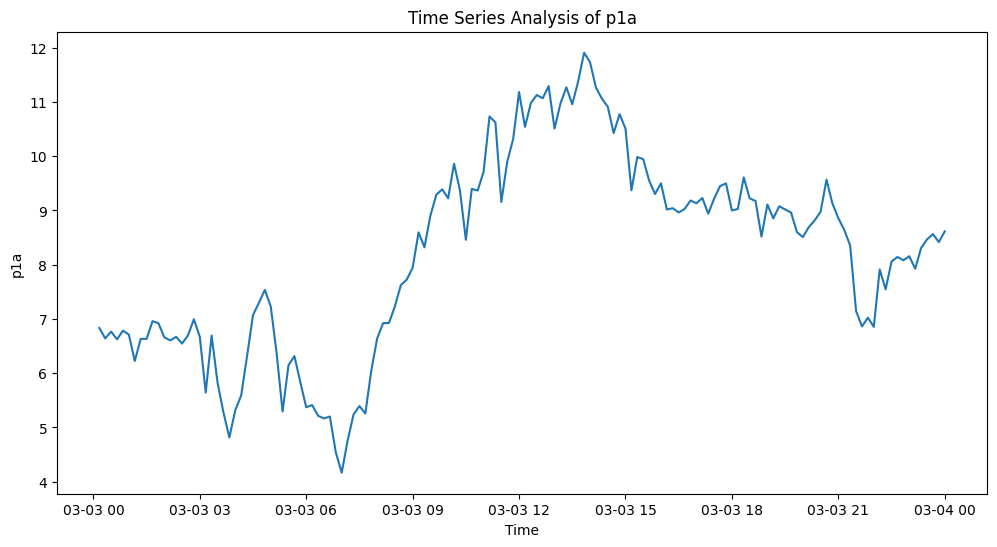

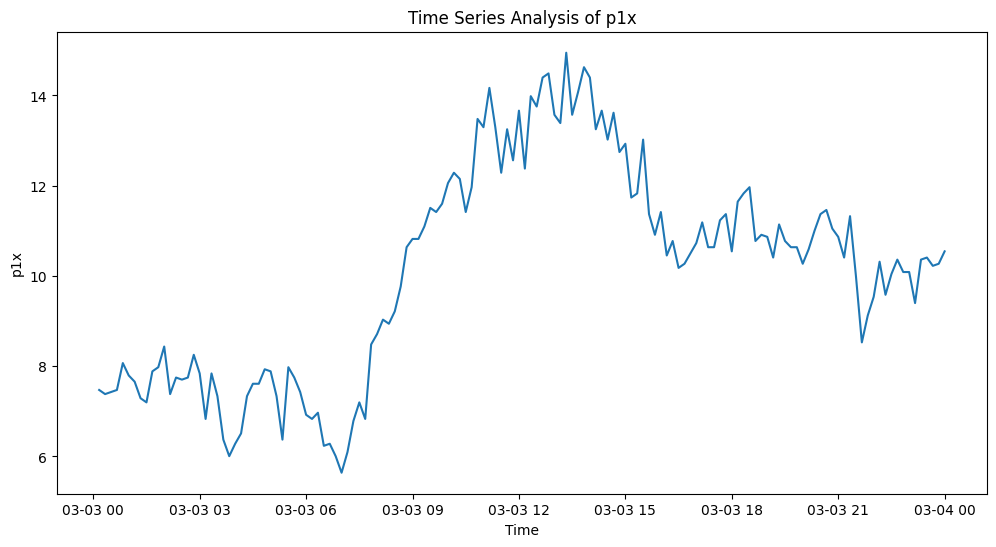

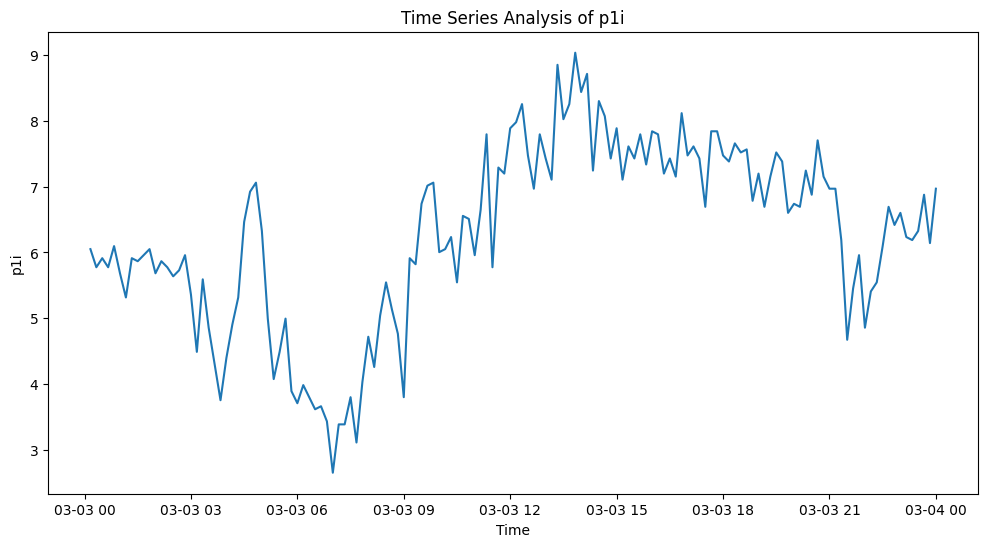

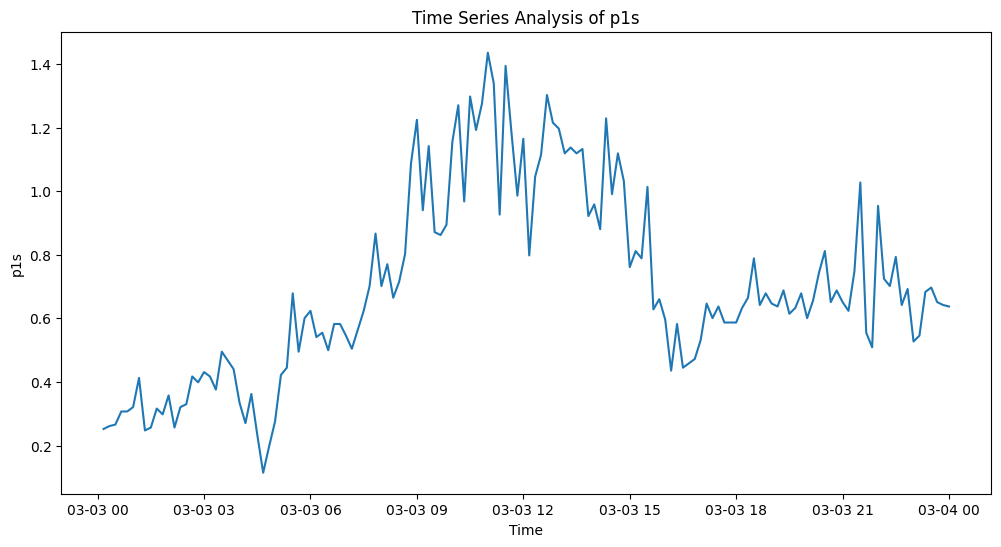

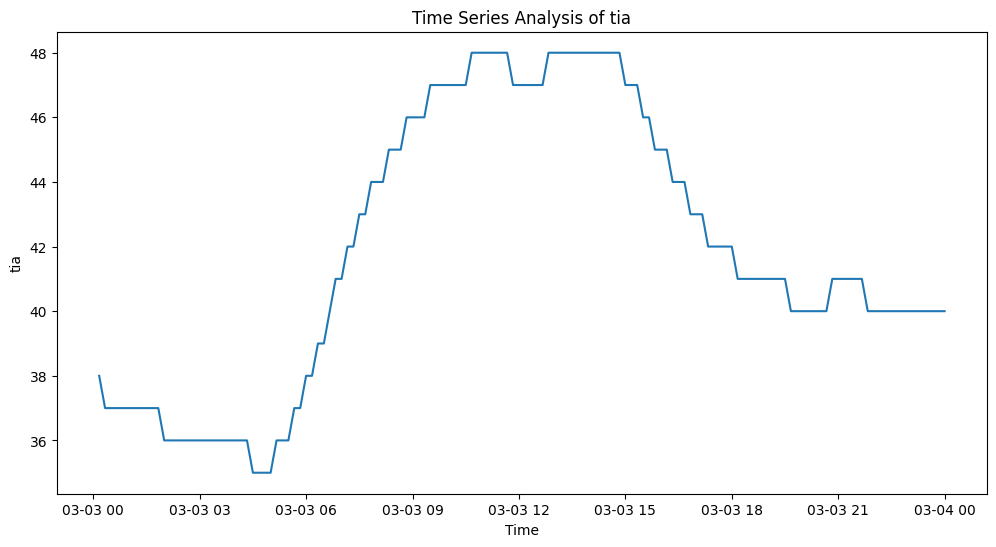

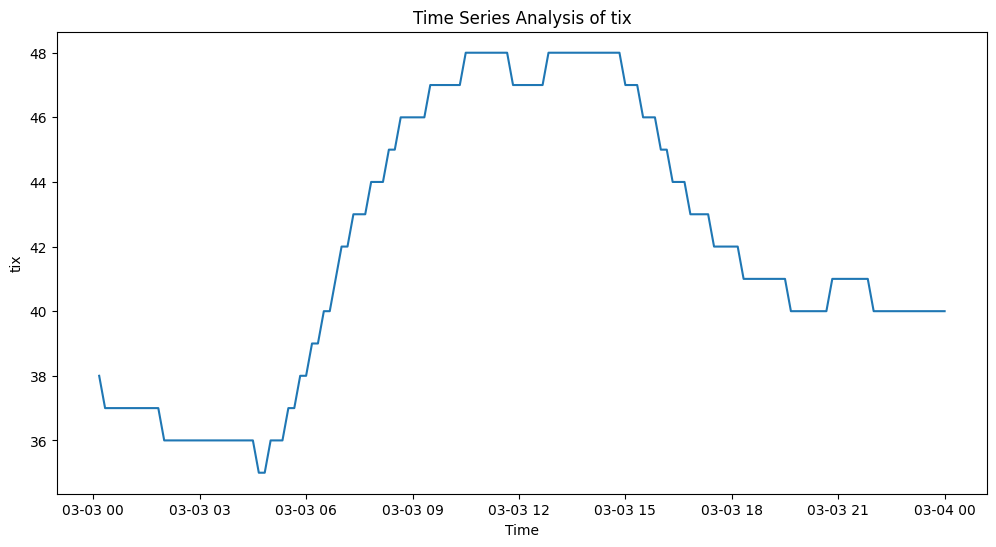

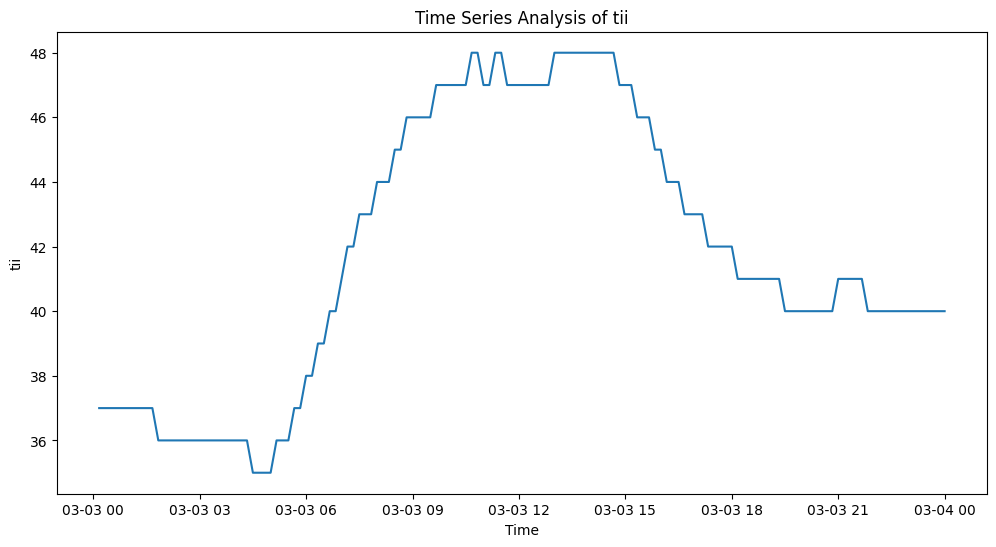

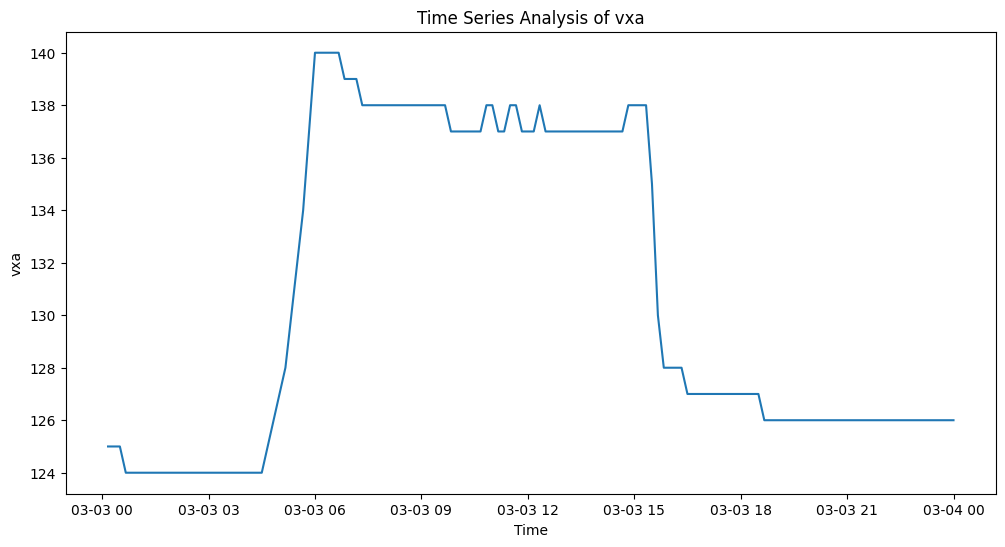

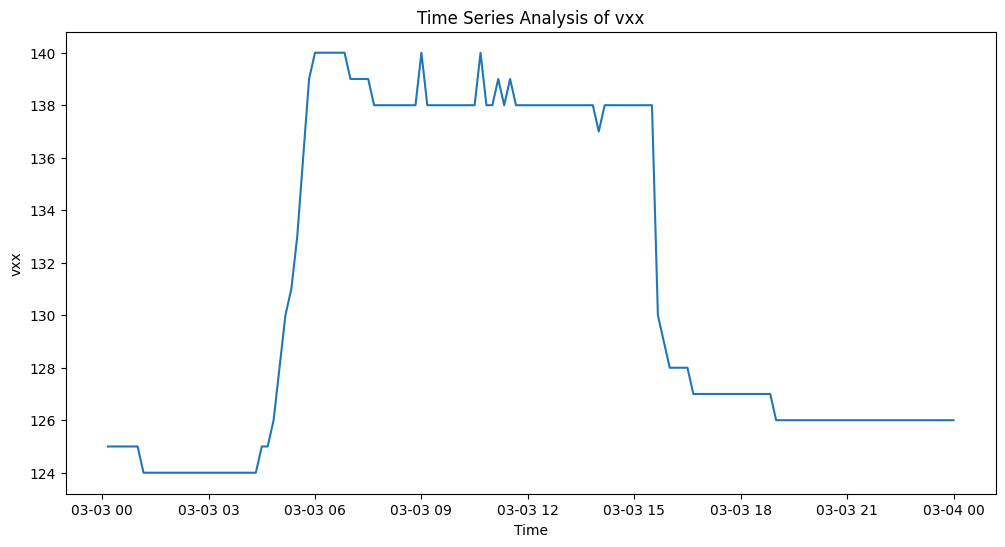

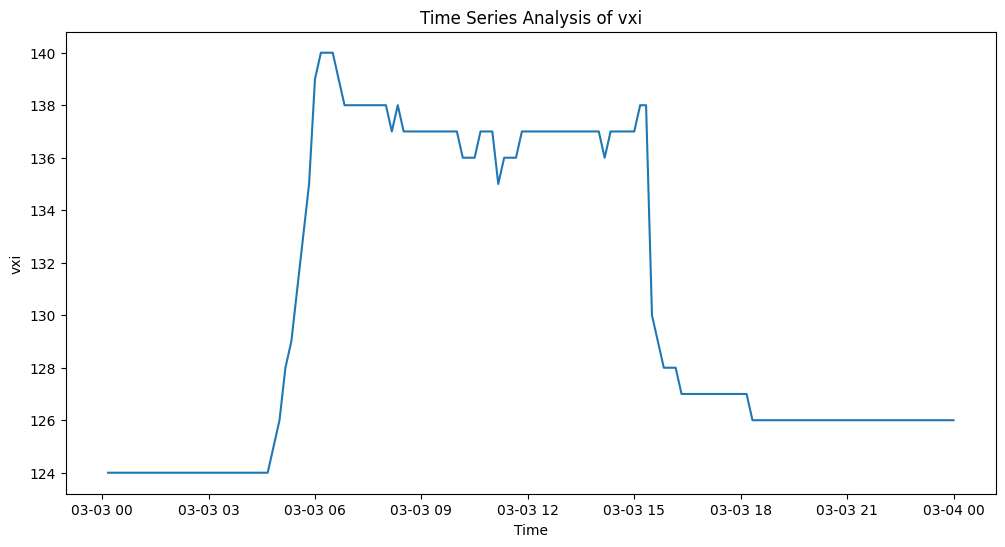

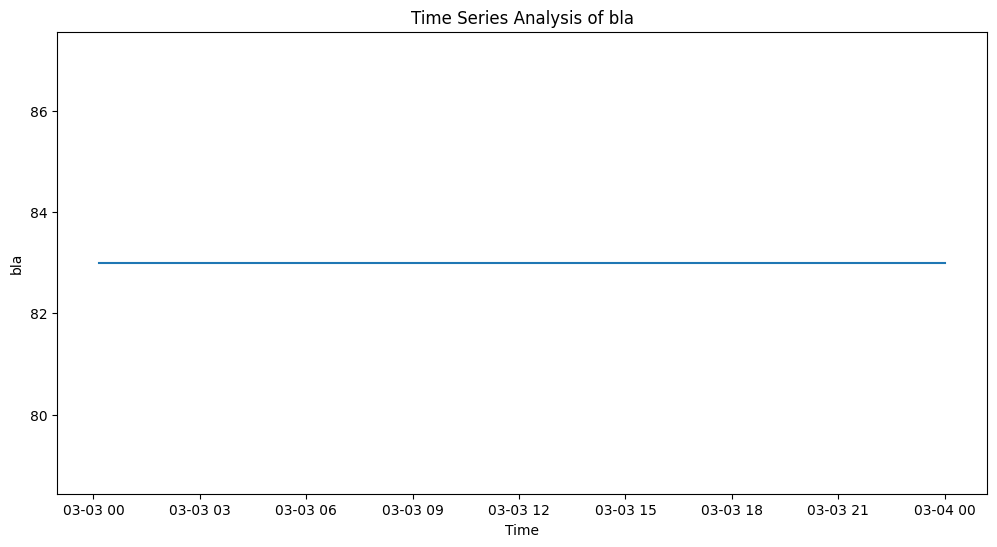

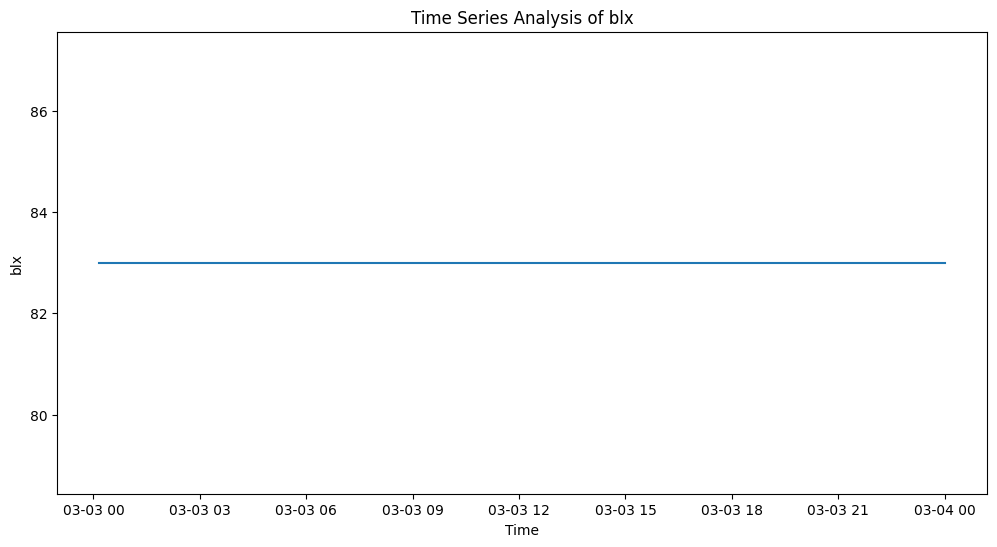

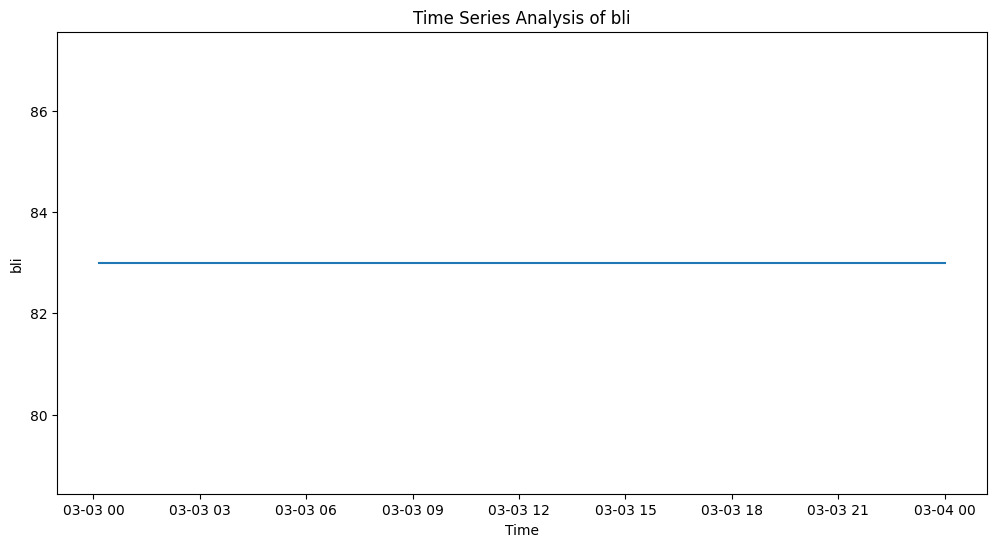

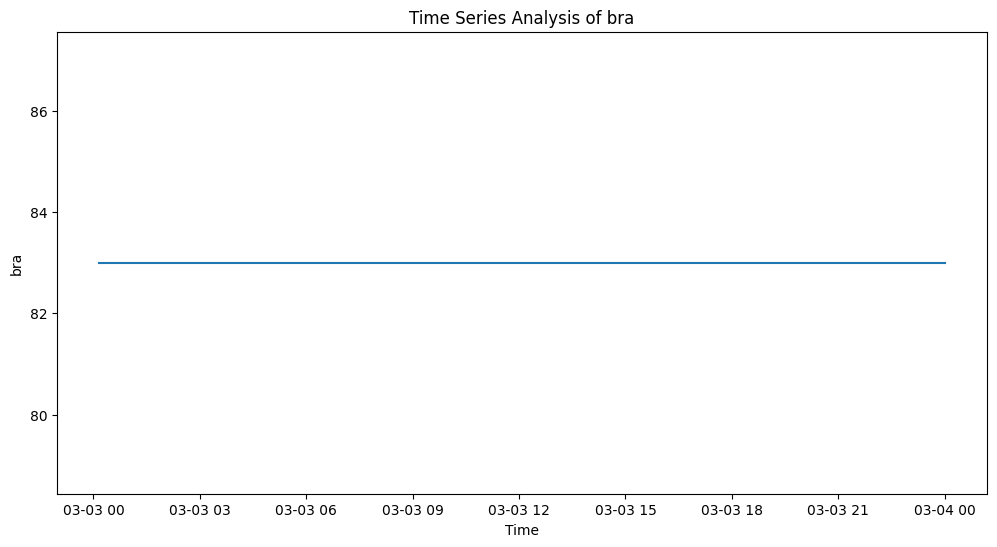

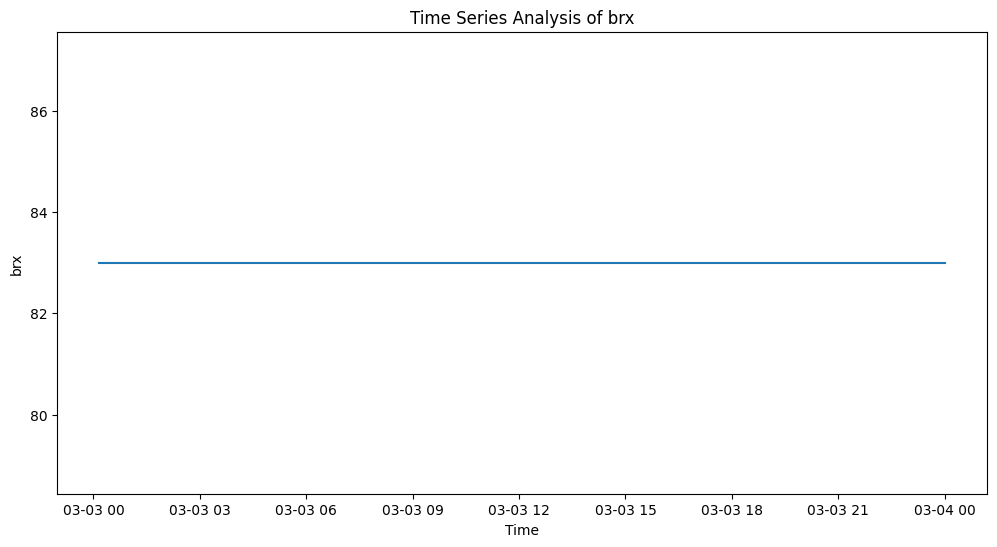

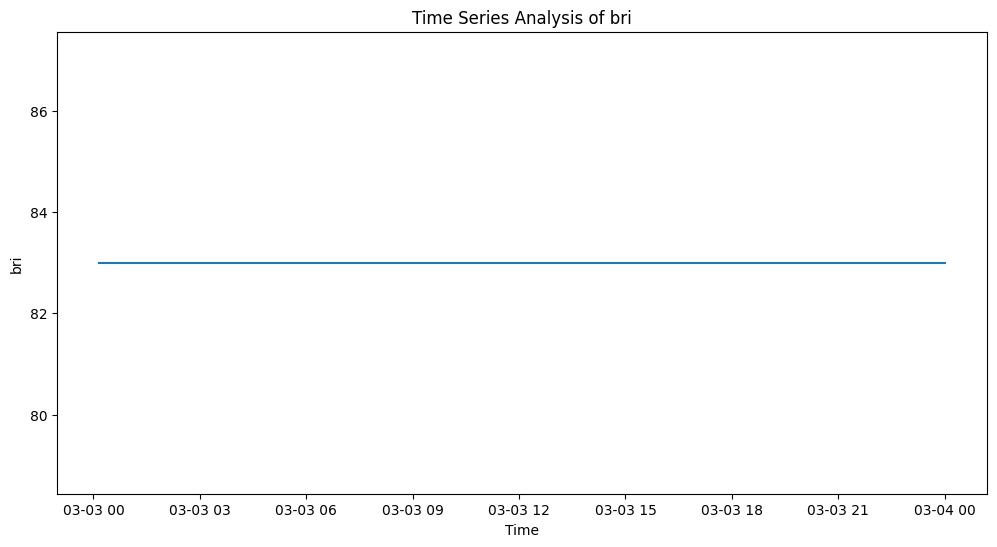

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

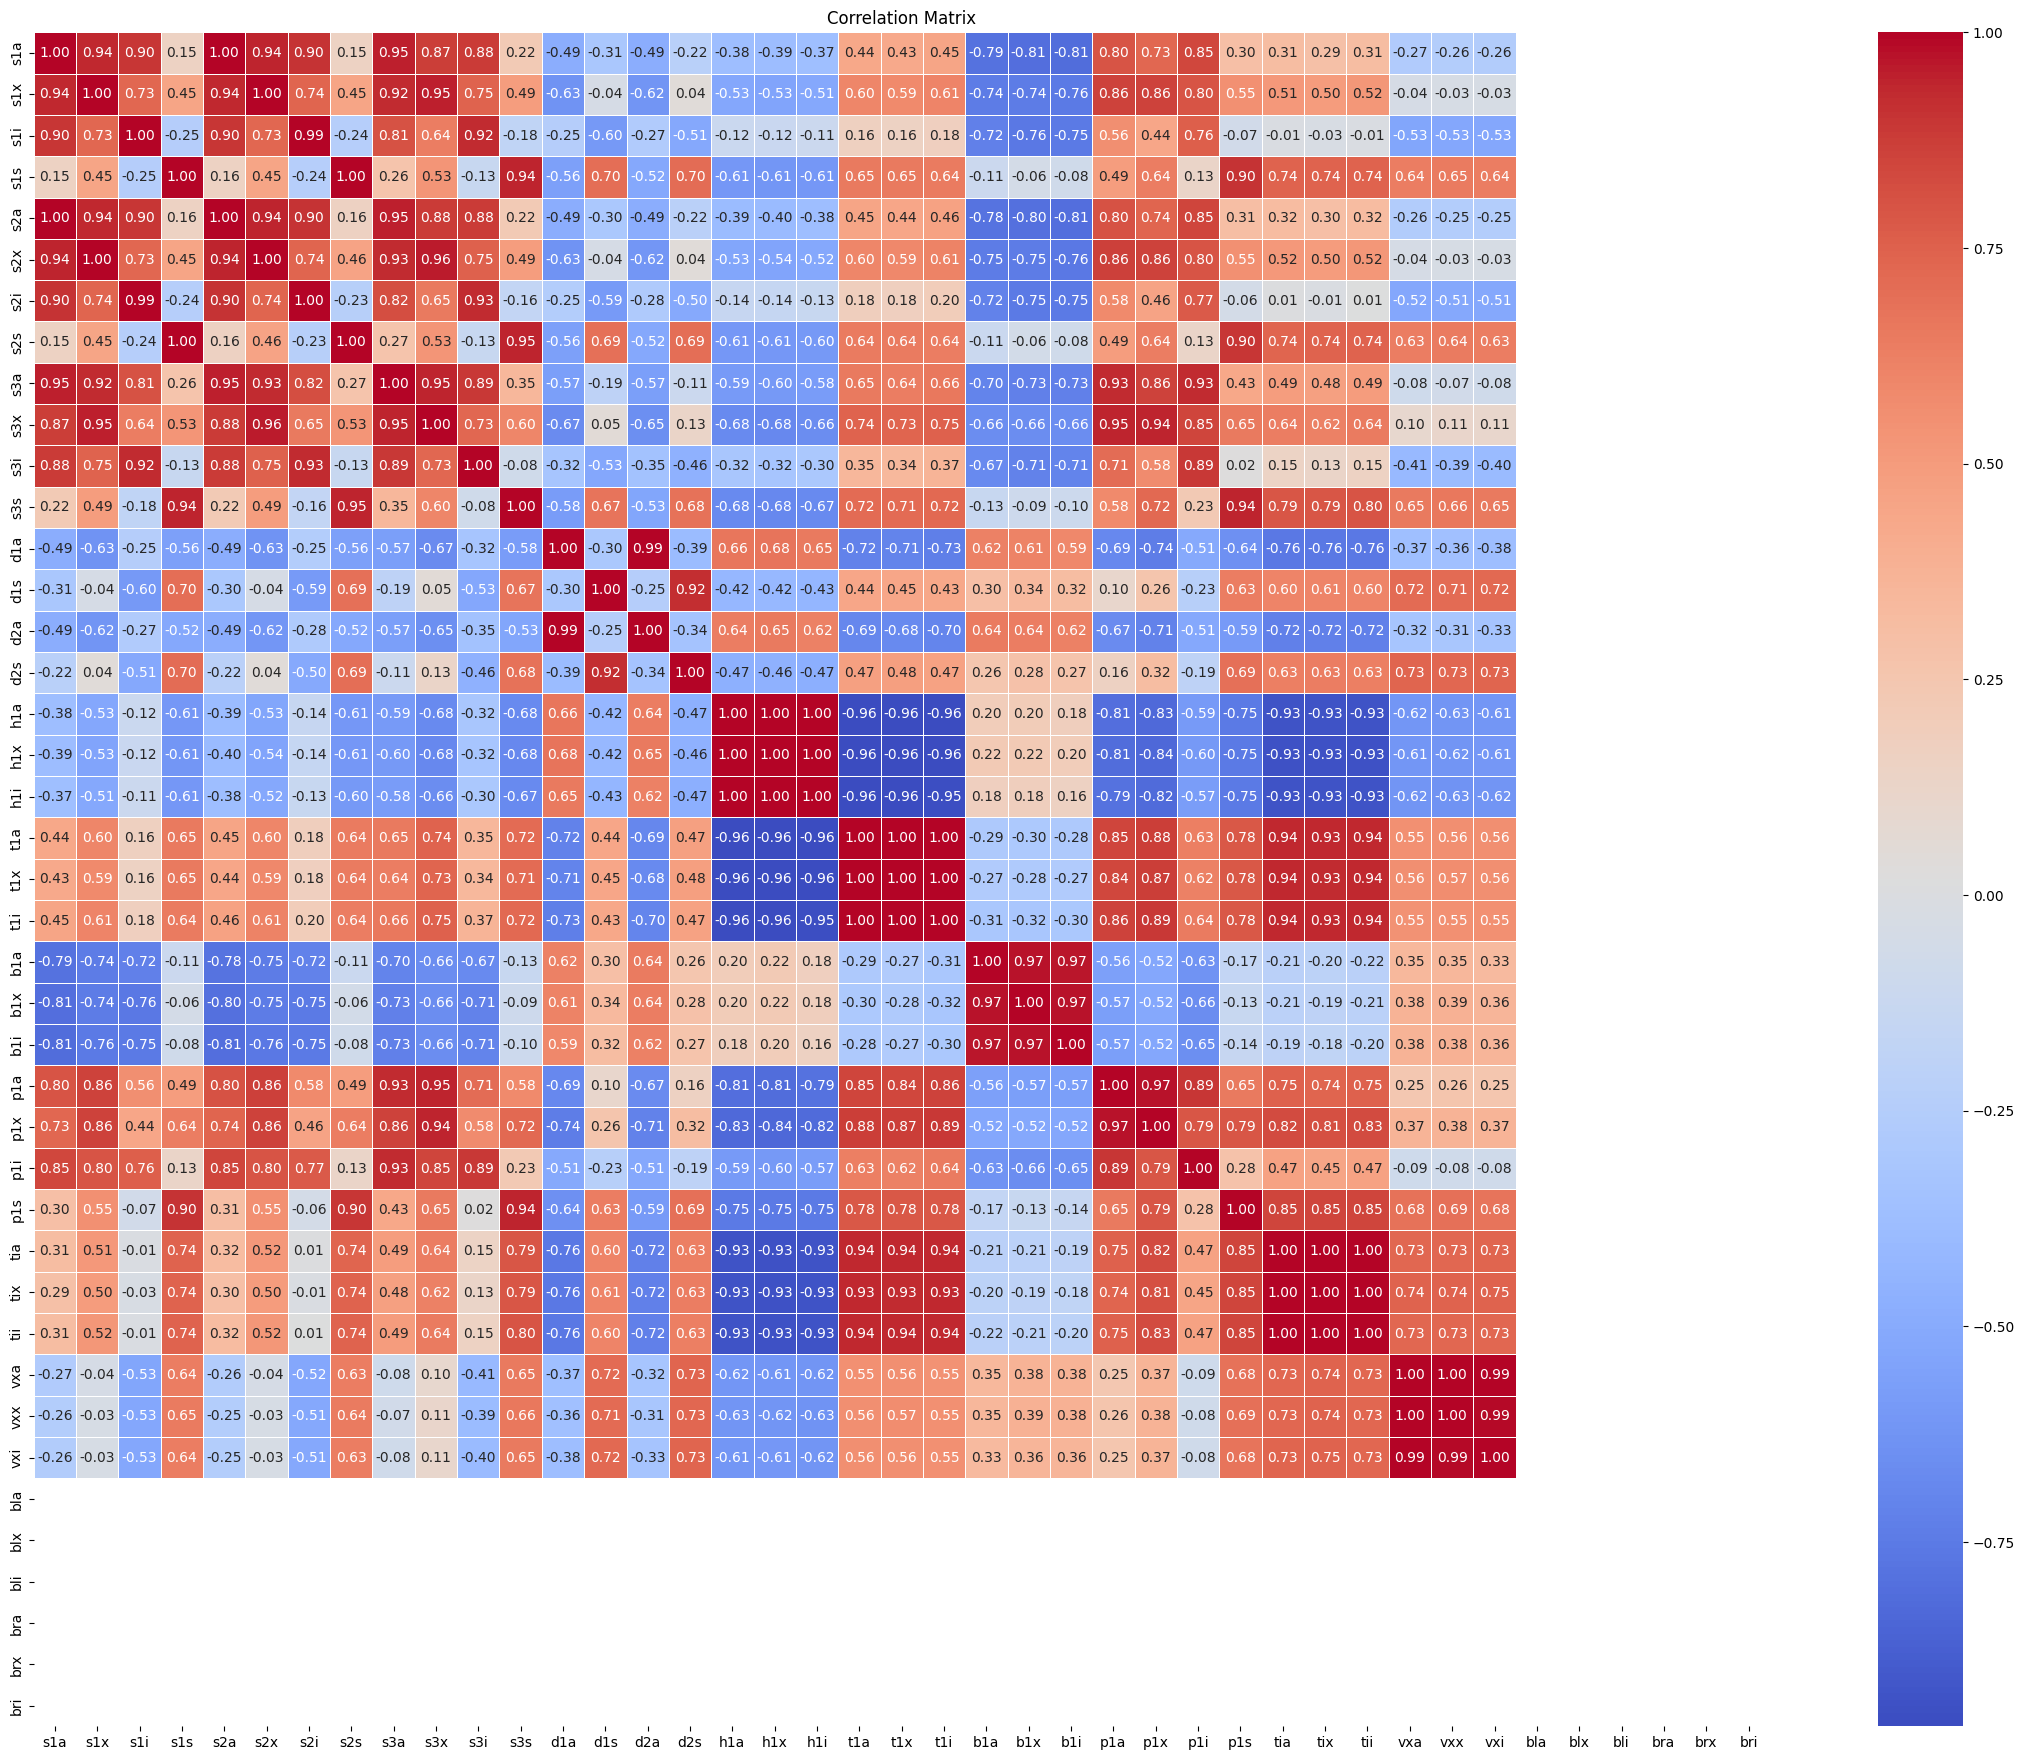

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

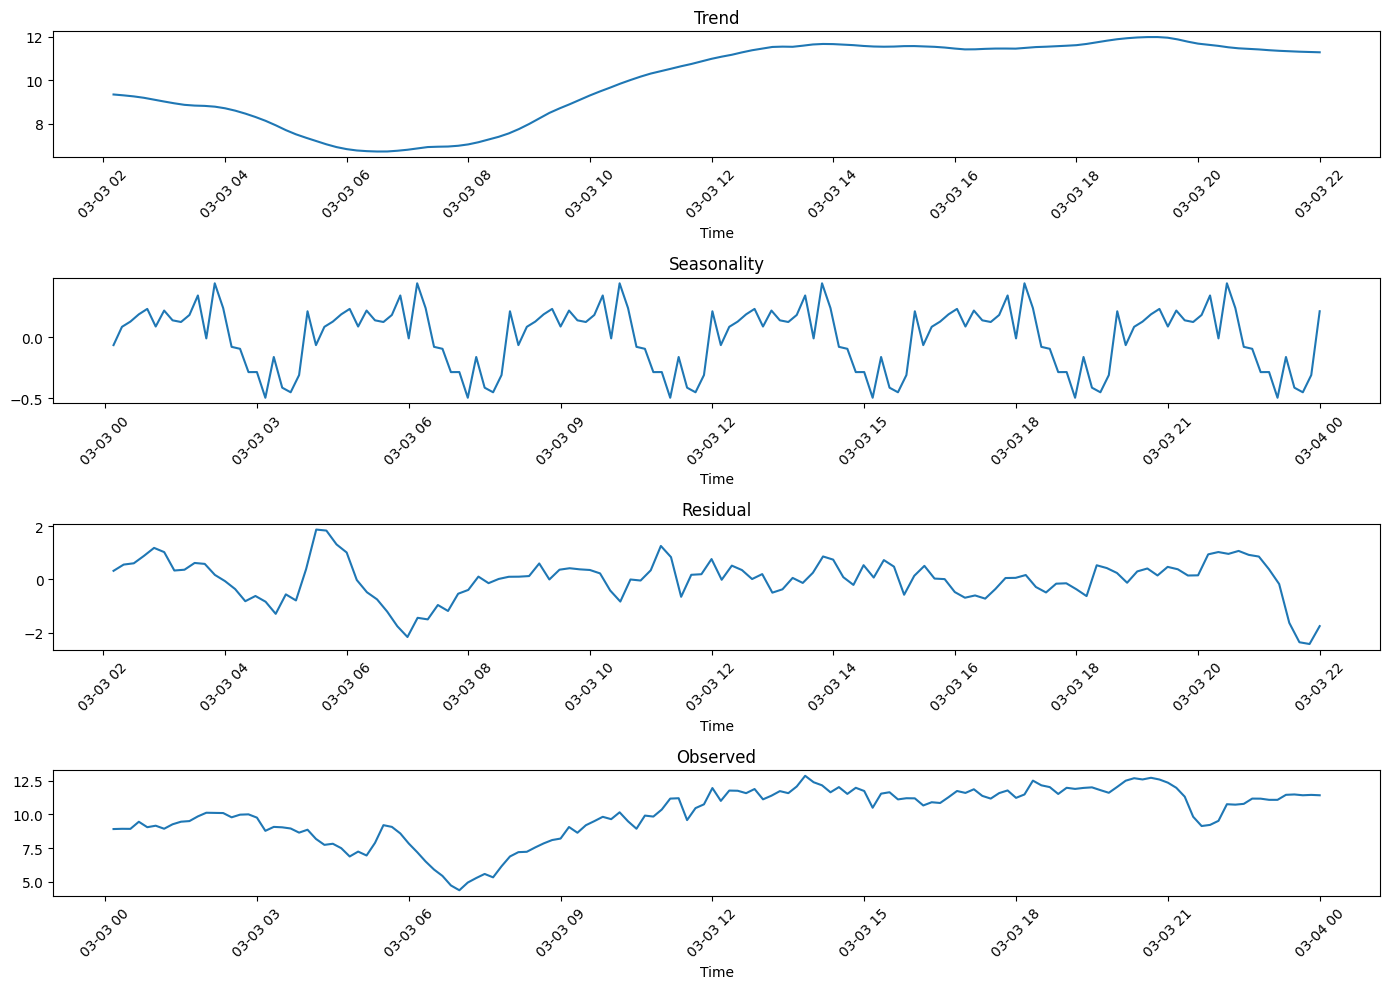

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


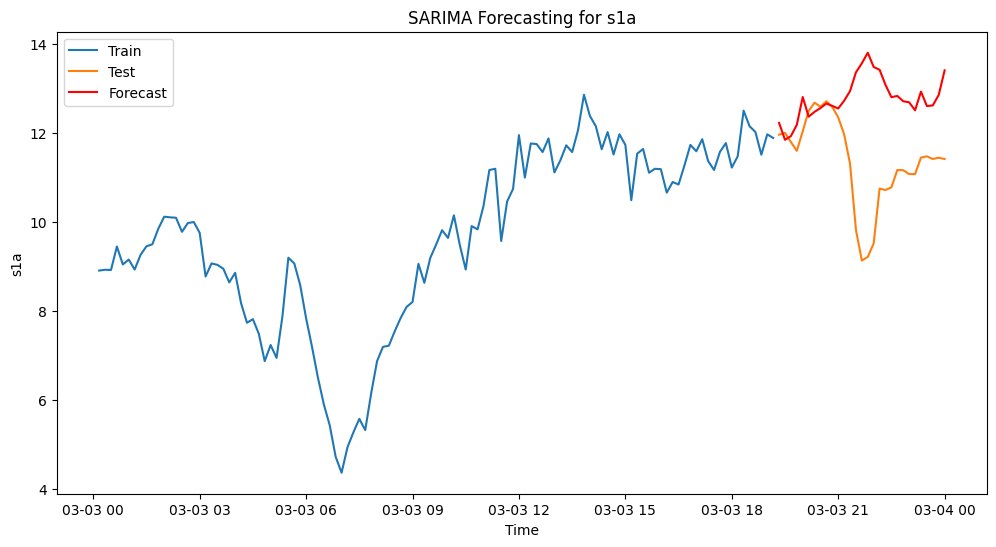

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()